In [1]:
import pandas as pd
data = pd.read_excel(r'football.xlsx')

In [24]:
data.shape

(17981, 75)

In [3]:
G_data = data[data['Preferred Positions'].str.contains('GK')]
G_data_X = G_data.iloc[:,13:-28]
G_data_Y = G_data.iloc[:,6]
G_data_X['rating'] = G_data_Y
object_columns = G_data_X.select_dtypes(include='object').columns
for i in object_columns:
    G_data_X = G_data_X[G_data_X[i].str.isdigit()]
G_data_X[object_columns] = G_data_X[object_columns].astype('float64')
g_data = G_data_X.copy()
gx = g_data.iloc[:,:-1]
gy = g_data.iloc[:,-1]
gy = gy.reset_index()
mean_values = gx.mean()
gx_avg = gx.fillna(mean_values)
gx_avg = gx_avg.reset_index()
gx_avg.isnull().sum()
gx_avg = gx_avg.drop(columns='index')
gx_avg.head()

,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
0,58.0,29.0,52.0,35.0,48.0,70.0,15.0,14.0,30.0,13.0,...,85.0,55.0,25.0,11.0,61.0,44.0,10.0,83.0,70.0,11.0
1,57.0,38.0,60.0,43.0,42.0,64.0,17.0,21.0,18.0,13.0,...,88.0,50.0,31.0,13.0,58.0,40.0,21.0,64.0,68.0,13.0
2,46.0,23.0,61.0,45.0,23.0,52.0,14.0,19.0,13.0,14.0,...,81.0,32.0,36.0,16.0,52.0,38.0,18.0,70.0,44.0,12.0
3,49.0,38.0,55.0,49.0,28.0,70.0,13.0,20.0,26.0,15.0,...,80.0,37.0,39.0,11.0,43.0,39.0,11.0,69.0,50.0,17.0
4,43.0,34.0,67.0,49.0,16.0,55.0,13.0,13.0,12.0,11.0,...,84.0,29.0,22.0,18.0,60.0,41.0,12.0,78.0,55.0,13.0


In [4]:
CB_data = data[data['Preferred Positions'].str.contains('CB')]
LWB_data = data[data['Preferred Positions'].str.contains('LWB')]
RWB_data = data[data['Preferred Positions'].str.contains('RWB')]
LB_data = data[data['Preferred Positions'].str.contains('LB')]
RB_data = data[data['Preferred Positions'].str.contains('RB')]
B_data = pd.concat([CB_data, LWB_data,RWB_data ,LB_data,RB_data])
B_data = B_data.drop_duplicates()
B_data_X = B_data.iloc[:,13:-28]
B_data_X = B_data_X.filter(regex='^(?!.*GK).*$', axis=1)
B_data_X.head()
B_data_Y = B_data.iloc[:,6]
B_data_X['rating'] = B_data_Y
object_columns = B_data_X.select_dtypes(include='object').columns
for i in object_columns:
    B_data_X = B_data_X[B_data_X[i].str.isdigit()]
B_data_X[object_columns] = B_data_X[object_columns].astype('float64')
b_data = B_data_X.copy()
bx = b_data.iloc[:,:-1]
by = b_data.iloc[:,-1]
by = by.reset_index()
mean_values = bx.mean()
bx_avg = bx.fillna(mean_values)
bx_avg = bx_avg.reset_index()
bx_avg.isnull().sum()
bx_avg = bx_avg.drop(columns='index')
bx_avg.head()

,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
0,75.0,84.0,79.0,60.0,84.0,80.0,66.0,73.0,61.0,60.0,...,85.0,78.0,79.0,91.0,77.0,84.0,89.0,81.0,63.0,66.0
1,68.0,92.0,59.0,64.0,57.0,82.0,58.0,60.0,58.0,33.0,...,82.0,59.0,78.0,90.0,78.0,68.0,92.0,91.0,50.0,45.0
2,62.0,82.0,60.0,52.0,75.0,84.0,44.0,56.0,69.0,39.0,...,86.0,79.0,74.0,88.0,72.0,73.0,88.0,85.0,74.0,58.0
3,72.0,82.0,58.0,53.0,71.0,86.0,69.0,56.0,67.0,34.0,...,82.0,75.0,79.0,90.0,78.0,74.0,91.0,91.0,76.0,53.0
4,62.0,86.0,63.0,58.0,76.0,82.0,55.0,49.0,53.0,42.0,...,85.0,79.0,67.0,89.0,67.0,67.0,86.0,80.0,52.0,47.0


In [5]:
RM_data = data[data['Preferred Positions'].str.contains('RM')]
LM_data = data[data['Preferred Positions'].str.contains('LM')]
CM_data = data[data['Preferred Positions'].str.contains('CM')]
CAM_data = data[data['Preferred Positions'].str.contains('CAM')]
CDM_data = data[data['Preferred Positions'].str.contains('CDM')]
ST_data = data[data['Preferred Positions'].str.contains('ST')]
DMF_data = data[data['Preferred Positions'].str.contains('DMF')]
OMF_data = data[data['Preferred Positions'].str.contains('OMF')]
M_data = pd.concat([RM_data,LM_data,CM_data ,CAM_data,CDM_data,ST_data,DMF_data,OMF_data])
M_data = M_data.drop_duplicates()
M_data_X = M_data.iloc[:,13:-28]
M_data_X = M_data_X.filter(regex='^(?!.*GK).*$', axis=1)
M_data_X.head()
M_data_Y = M_data.iloc[:,6]
M_data_X['rating'] = M_data_Y
object_columns = M_data_X.select_dtypes(include='object').columns
for i in object_columns:
    M_data_X = M_data_X[M_data_X[i].str.isdigit()]
M_data_X[object_columns] = M_data_X[object_columns].astype('float64')
m_data = M_data_X.copy()
mx = m_data.iloc[:,:-1]
my = m_data.iloc[:,-1]
my = my.reset_index()
mean_values = mx.mean()
mx_avg = mx.fillna(mean_values)
mx_avg = mx_avg.reset_index()
mx_avg.isnull().sum()
mx_avg = mx_avg.drop(columns='index')
mx_avg.head()

,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
0,76.0,68.0,80.0,75.0,87.0,84.0,90.0,83.0,85.0,83.0,...,88.0,90.0,85.0,40.0,75.0,87.0,51.0,73.0,90.0,82.0
1,88.0,80.0,90.0,87.0,87.0,86.0,80.0,78.0,90.0,85.0,...,87.0,81.0,84.0,35.0,84.0,85.0,39.0,72.0,83.0,83.0
2,87.0,47.0,89.0,91.0,89.0,86.0,80.0,87.0,92.0,85.0,...,87.0,84.0,87.0,26.0,86.0,68.0,26.0,67.0,83.0,86.0
3,77.0,44.0,78.0,82.0,87.0,87.0,86.0,85.0,84.0,76.0,...,83.0,89.0,80.0,22.0,74.0,90.0,56.0,57.0,90.0,74.0
4,77.0,65.0,82.0,75.0,85.0,87.0,88.0,87.0,83.0,82.0,...,84.0,84.0,86.0,30.0,75.0,68.0,42.0,70.0,86.0,91.0


In [6]:
LW_data = data[data['Preferred Positions'].str.contains('LW')]
RW_data = data[data['Preferred Positions'].str.contains('RW')]
ST_data = data[data['Preferred Positions'].str.contains('ST')]
CF_data = data[data['Preferred Positions'].str.contains('CF')]
F_data = pd.concat([LW_data,RW_data,ST_data ,CF_data])
F_data = F_data.drop_duplicates()
F_data_X = F_data.iloc[:,13:-28]
F_data_X = F_data_X.filter(regex='^(?!.*GK).*$', axis=1)
F_data_Y = F_data.iloc[:,6]
F_data_X['rating'] = F_data_Y
object_columns = F_data_X.select_dtypes(include='object').columns
for i in object_columns:
    F_data_X = F_data_X[F_data_X[i].str.isdigit()]
F_data_X[object_columns] = F_data_X[object_columns].astype('float64')
f_data = F_data_X.copy()
fx = f_data.iloc[:,:-1]
fy = f_data.iloc[:,-1]
mean_values = fx.mean()
fx_avg = fx.fillna(mean_values)
fx_avg = fx_avg.reset_index()
fy = fy.reset_index()
fx_avg.isnull().sum()
fx_avg = fx_avg.drop(columns='index')
fx_avg.head()

,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
0,89.0,63.0,89.0,63.0,93.0,95.0,85.0,81.0,91.0,94.0,...,96.0,83.0,94.0,23.0,91.0,92.0,31.0,80.0,85.0,88.0
1,94.0,56.0,96.0,82.0,95.0,92.0,75.0,81.0,96.0,89.0,...,88.0,81.0,80.0,33.0,90.0,78.0,24.0,53.0,80.0,83.0
2,93.0,54.0,93.0,91.0,92.0,87.0,80.0,82.0,93.0,83.0,...,85.0,86.0,79.0,22.0,87.0,79.0,27.0,65.0,86.0,79.0
3,88.0,80.0,90.0,87.0,87.0,86.0,80.0,78.0,90.0,85.0,...,87.0,81.0,84.0,35.0,84.0,85.0,39.0,72.0,83.0,83.0
4,87.0,69.0,90.0,80.0,86.0,86.0,82.0,84.0,87.0,88.0,...,90.0,79.0,81.0,11.0,86.0,76.0,22.0,61.0,76.0,87.0


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [26]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import json as json
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor as XGBR
from xgboost import XGBRFClassifier as XGBC
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.linear_model import LinearRegression as LinearR
from sklearn.model_selection import KFold, cross_val_score as CVS, train_test_split as TTS
from sklearn.metrics import mean_squared_error as MSE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
import datetime
from lightgbm import LGBMRegressor as LGBR
from lightgbm import LGBMClassifier as LGBC
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import GridSearchCV 
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder,KBinsDiscretizer
from sklearn.impute import SimpleImputer
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report 
import shap  
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve, auc 
import seaborn as sns
#因子分析
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
#无监督聚类
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import Birch
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

forward feature selection

In [65]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(fx_avg,fy,test_size=0.2,random_state=420)
reg = XGBR(n_estimators=200).fit(Xtrain,Ytrain) #训练
reg.predict(Xtest) #传统接口predict
print("R^2",reg.score(Xtest,Ytest))#R^2评估指标
print("MSE",MSE(Ytest,reg.predict(Xtest)))
print("importance",reg.feature_importances_)

R^2 0.9657321651675996
MSE 532480.8617846634
importance [0.00205336 0.00055054 0.00090615 0.00054407 0.4629038  0.04277593
 0.00723812 0.00109086 0.01221863 0.02348962 0.00061907 0.00734221
 0.003562   0.00125969 0.00234012 0.00591061 0.00138371 0.00090846
 0.12500137 0.1837956  0.03794292 0.03366282 0.00461753 0.01195446
 0.00329682 0.01472706 0.00402957 0.00188648 0.00198844]


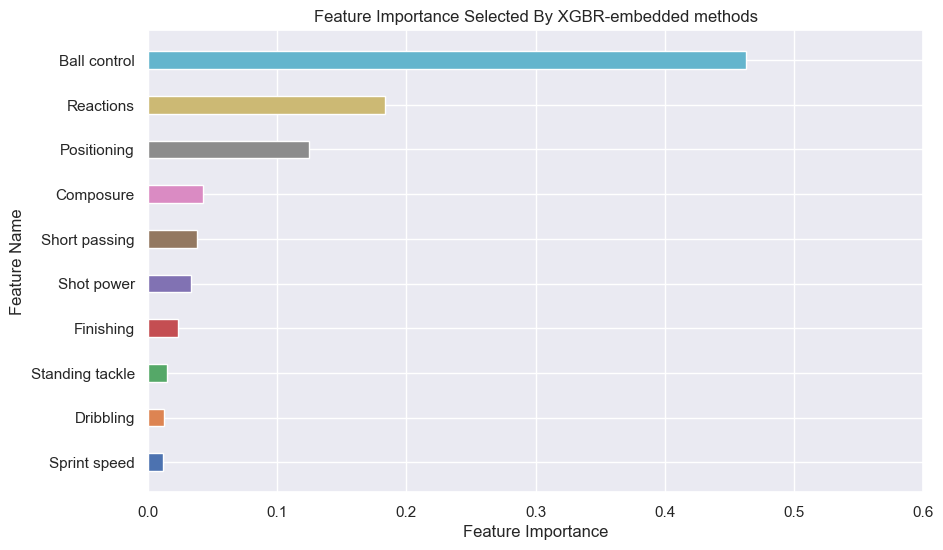

In [66]:

sns.set()
model = reg

name = fx_avg.columns
impxgb = pd.DataFrame({'cols': fx_avg.columns, 'imp': model.feature_importances_}).sort_values('imp', ascending = True)

name = impxgb['cols'][-10:]
imp = impxgb['imp'][-10:]

plt.figure(figsize=[10, 6])

for i, val in enumerate(imp):
    plt.barh(i, val, height=0.4)  # Adjust the height as needed

plt.yticks(range(len(name)), name)  # Set y-axis ticks and labels
plt.xlim(0, 0.6)  # Set x-axis limits
plt.ylabel("Feature Name")
plt.xlabel("Feature Importance")
plt.title("Feature Importance Selected By XGBR-embedded methods")

plt.grid(True)  # Add gridlines

plt.show()




forward factor analysis

In [67]:
newxgb =  fx_avg.loc[:,list(impxgb['cols'][-10:])].copy()
newxgb['Rating'] = fy['rating']

In [68]:
newxgb.head(10)

,Sprint speed,Dribbling,Standing tackle,Finishing,Shot power,Short passing,Composure,Positioning,Reactions,Ball control,Rating
0,91.0,91.0,31.0,94.0,94.0,83.0,95.0,95.0,96.0,93.0,94
1,90.0,96.0,24.0,89.0,80.0,81.0,92.0,90.0,88.0,95.0,92
2,87.0,93.0,27.0,83.0,79.0,86.0,87.0,85.0,85.0,92.0,90
3,84.0,90.0,39.0,85.0,84.0,81.0,86.0,86.0,87.0,87.0,89
4,86.0,87.0,22.0,88.0,81.0,79.0,86.0,91.0,90.0,86.0,88
5,77.0,88.0,44.0,74.0,80.0,85.0,85.0,83.0,81.0,88.0,86
6,90.0,86.0,36.0,86.0,87.0,86.0,83.0,86.0,87.0,85.0,86
7,87.0,89.0,40.0,85.0,80.0,81.0,81.0,85.0,85.0,88.0,86
8,79.0,90.0,25.0,76.0,76.0,86.0,86.0,81.0,86.0,90.0,86
9,86.0,88.0,24.0,73.0,70.0,83.0,78.0,83.0,80.0,90.0,85


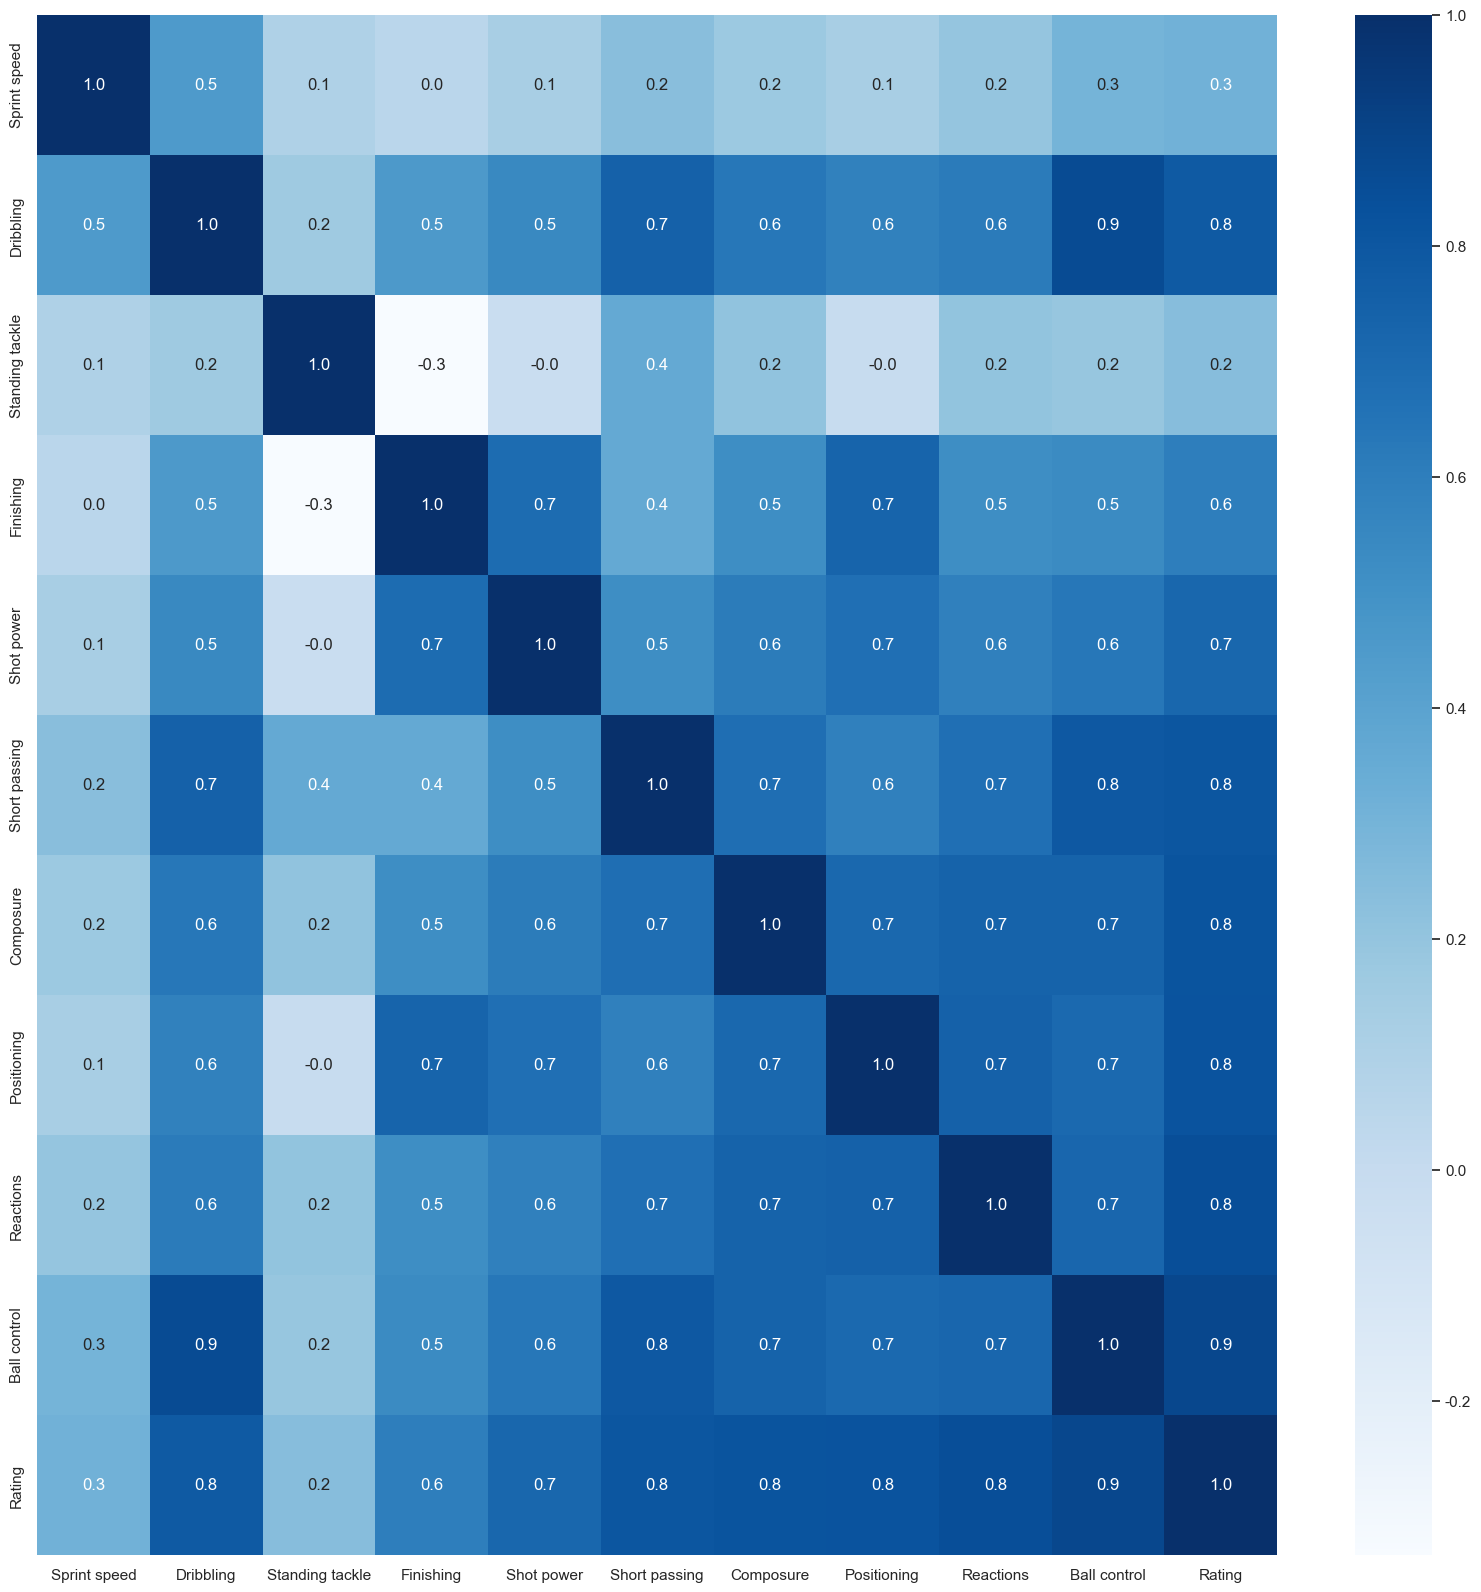

In [69]:
plt.figure(figsize=(20, 20))

# 绘制热力图，并显示数字（保留一位小数）
sns.heatmap(newxgb.corr(), annot=True, fmt='.1f', cmap='Blues')

# 显示图像
plt.show()

In [70]:
from factor_analyzer import FactorAnalyzer

In [71]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
fac = newxgb.iloc[:,:-1]
chi_square_value, p_value = calculate_bartlett_sphericity(fac)
chi_square_value, p_value

(34994.841069697286, 0.0)

In [72]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(fac)
kmo_model

0.882802747898057

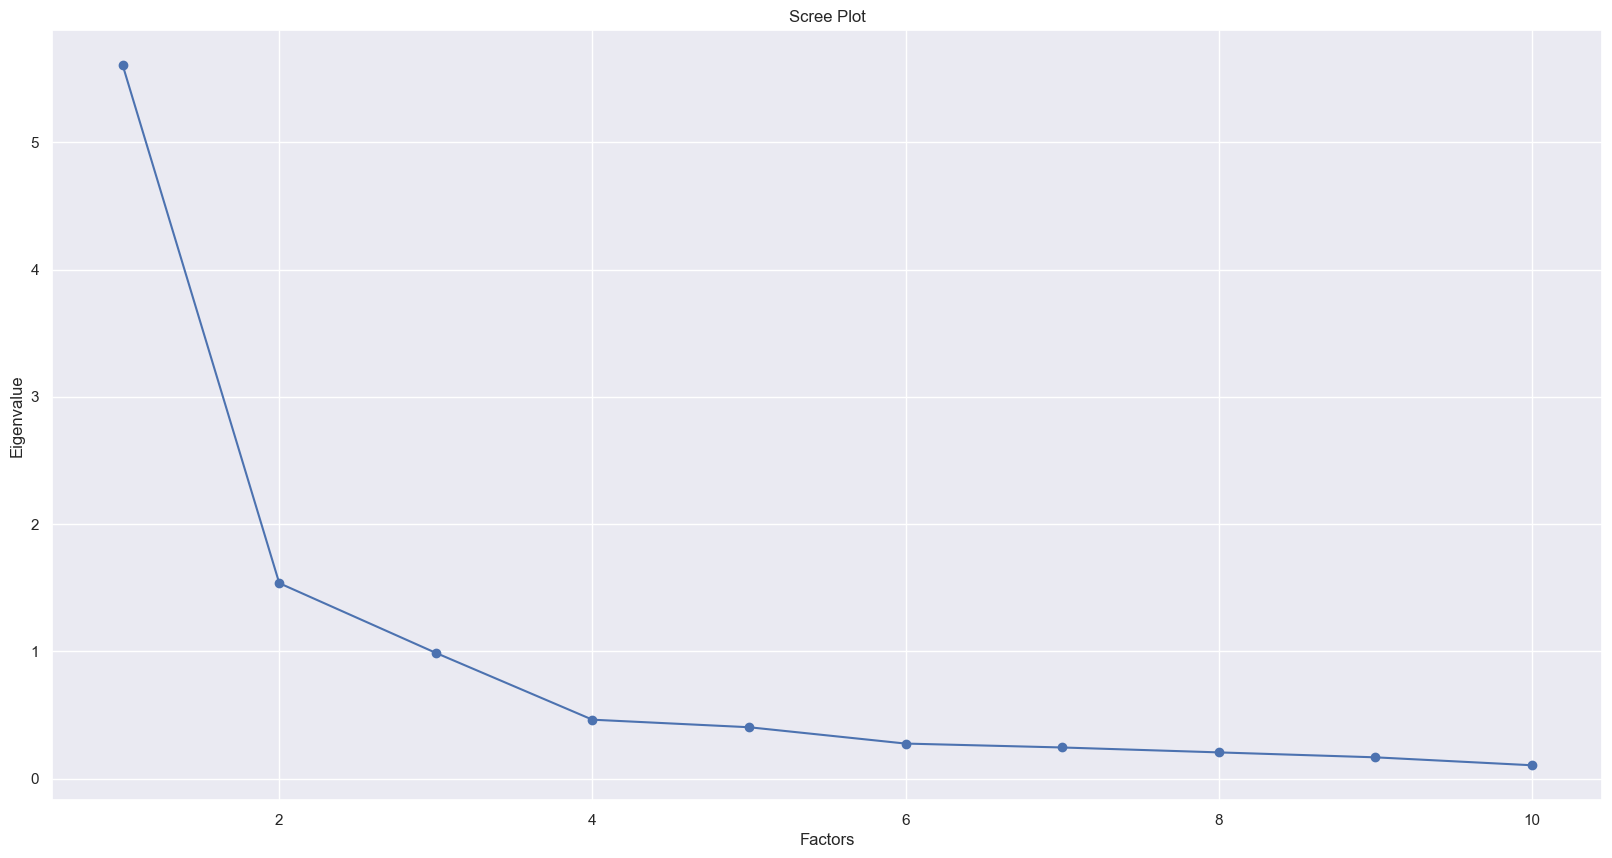

In [74]:
# 同样的数据绘制散点图和折线图
plt.figure(figsize=[20,10])
sns.set()
plt.scatter(range(1, fac.shape[1] + 1), ev)
plt.plot(range(1, fac.shape[1] + 1), ev)
 
# 显示图的标题和xy轴的名字
# 最好使用英文，中文可能乱码
plt.title("Scree Plot")  
plt.xlabel("Factors")
plt.ylabel("Eigenvalue")
plt.grid(True)  # Add gridlines
plt.show()  # 显示图形

In [87]:
# 选择方式： varimax 方差最大化
# 选择固定因子为 2 个
faa_two = FactorAnalyzer(2,rotation='varimax')
faa_two.fit(fac)

FactorAnalyzer(n_factors=2, rotation='varimax', rotation_kwargs={})

In [90]:
eigenvalues = faa_two.get_eigenvalues()
variance_explained = np.cumsum(eigenvalues[0]) / np.sum(eigenvalues[0])
print(variance_explained)
print("累计方差解释：",variance_explained[1])

[0.56048257 0.71409772 0.81294401 0.85931838 0.89976907 0.92738236
 0.95192873 0.97261514 0.98942087 1.        ]
累计方差解释： 0.7140977210018191


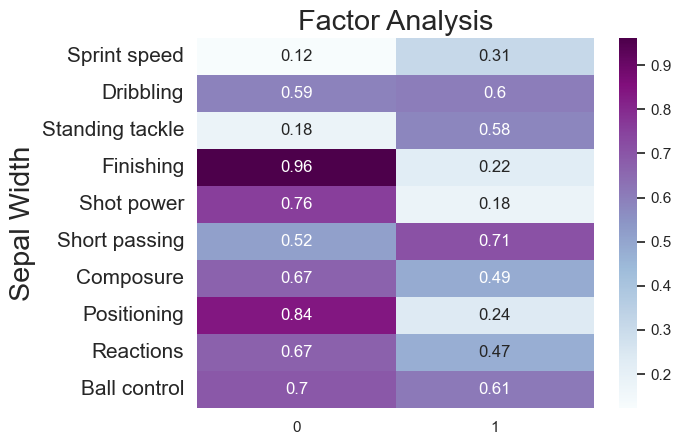

In [89]:
df1 = pd.DataFrame(np.abs(faa_two.loadings_),index=fac.columns)
# 绘图
ax = sns.heatmap(df1, annot=True, cmap="BuPu")
 
# 设置y轴字体大小
ax.yaxis.set_tick_params(labelsize=15)
plt.title("Factor Analysis", fontsize="xx-large")
 
# 设置y轴标签
plt.ylabel("Sepal Width", fontsize="xx-large")
# 显示图片
plt.show()

classification for forward

In [92]:
X = newxgb
model = AgglomerativeClustering(n_clusters=2)
agg_yhat = model.fit_predict(X)


In [93]:
model = Birch(threshold=0.01, n_clusters=2)
model.fit(X)
bir_yhat = model.predict(X)

In [94]:
model = MiniBatchKMeans(n_clusters=2)
model.fit(X)
mini_yhat = model.predict(X)

In [95]:
model = GaussianMixture(n_components=2)
model.fit(X)
gau_yhat = model.predict(X)

In [96]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

# Add the cluster labels to the data
newxgb['kme_cluster'] = kmeans.labels_

In [97]:
newxgb['agg'] = agg_yhat
newxgb['bir'] =bir_yhat 
newxgb['mini'] = mini_yhat 
newxgb['gau'] = gau_yhat

In [29]:
from scipy.spatial import distance

def calculate_cluster_distances(data, cluster_column):
    cluster_labels = data[cluster_column].unique()
    cluster_centers = []
    for cluster_label in cluster_labels:
        cluster_points = data[data[cluster_column] == cluster_label]
        cluster_center = np.mean(cluster_points, axis=0)
        cluster_centers.append(cluster_center)
    cluster_centers = np.array(cluster_centers)
    result = [0] * len(cluster_labels)
    for i, cluster_label in enumerate(cluster_labels):
        cluster_points = data[data[cluster_column] == cluster_label]
        for _, row in cluster_points.iterrows():
            row_array = row.values
            distance_to_center = distance.euclidean(row_array, cluster_centers[i])
            result[i] += distance_to_center
    return np.sum(result)


In [99]:
name = ["agg","bir","gau","kme_cluster","mini"]
result = []
for i in name:
    result.append(calculate_cluster_distances(newxgb,i))

In [101]:
result

[120509.23880006062,
 119734.87958679692,
 131365.4226110231,
 115996.51544431681,
 116287.03171202088]

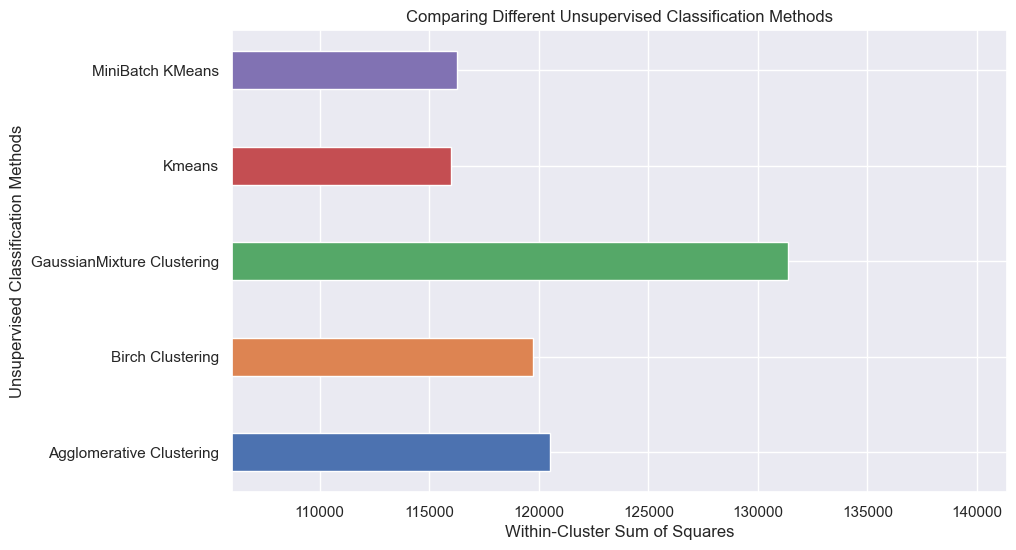

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

name = ["Agglomerative Clustering", "Birch Clustering", "GaussianMixture Clustering", "Kmeans", "MiniBatch KMeans"]

import matplotlib.pyplot as plt
import seaborn as sns



plt.figure(figsize=[10, 6])

for i, val in enumerate(result):
    plt.barh(i, val, height=0.4)  # Adjust the height as needed

plt.yticks(range(len(name)), name)  # Set y-axis ticks and labels
plt.xlim(min(result)-10000, max(result)+10000)  # Set x-axis limits
plt.xlabel("Within-Cluster Sum of Squares")
plt.ylabel("Unsupervised Classification Methods")
plt.title("Comparing Different Unsupervised Classification Methods")

plt.grid(True)  # Add gridlines

plt.show()





In [104]:
newxgb.groupby(newxgb['kme_cluster'])['Rating'].mean()

kme_cluster
0    71.955585
1    61.257792
Name: Rating, dtype: float64

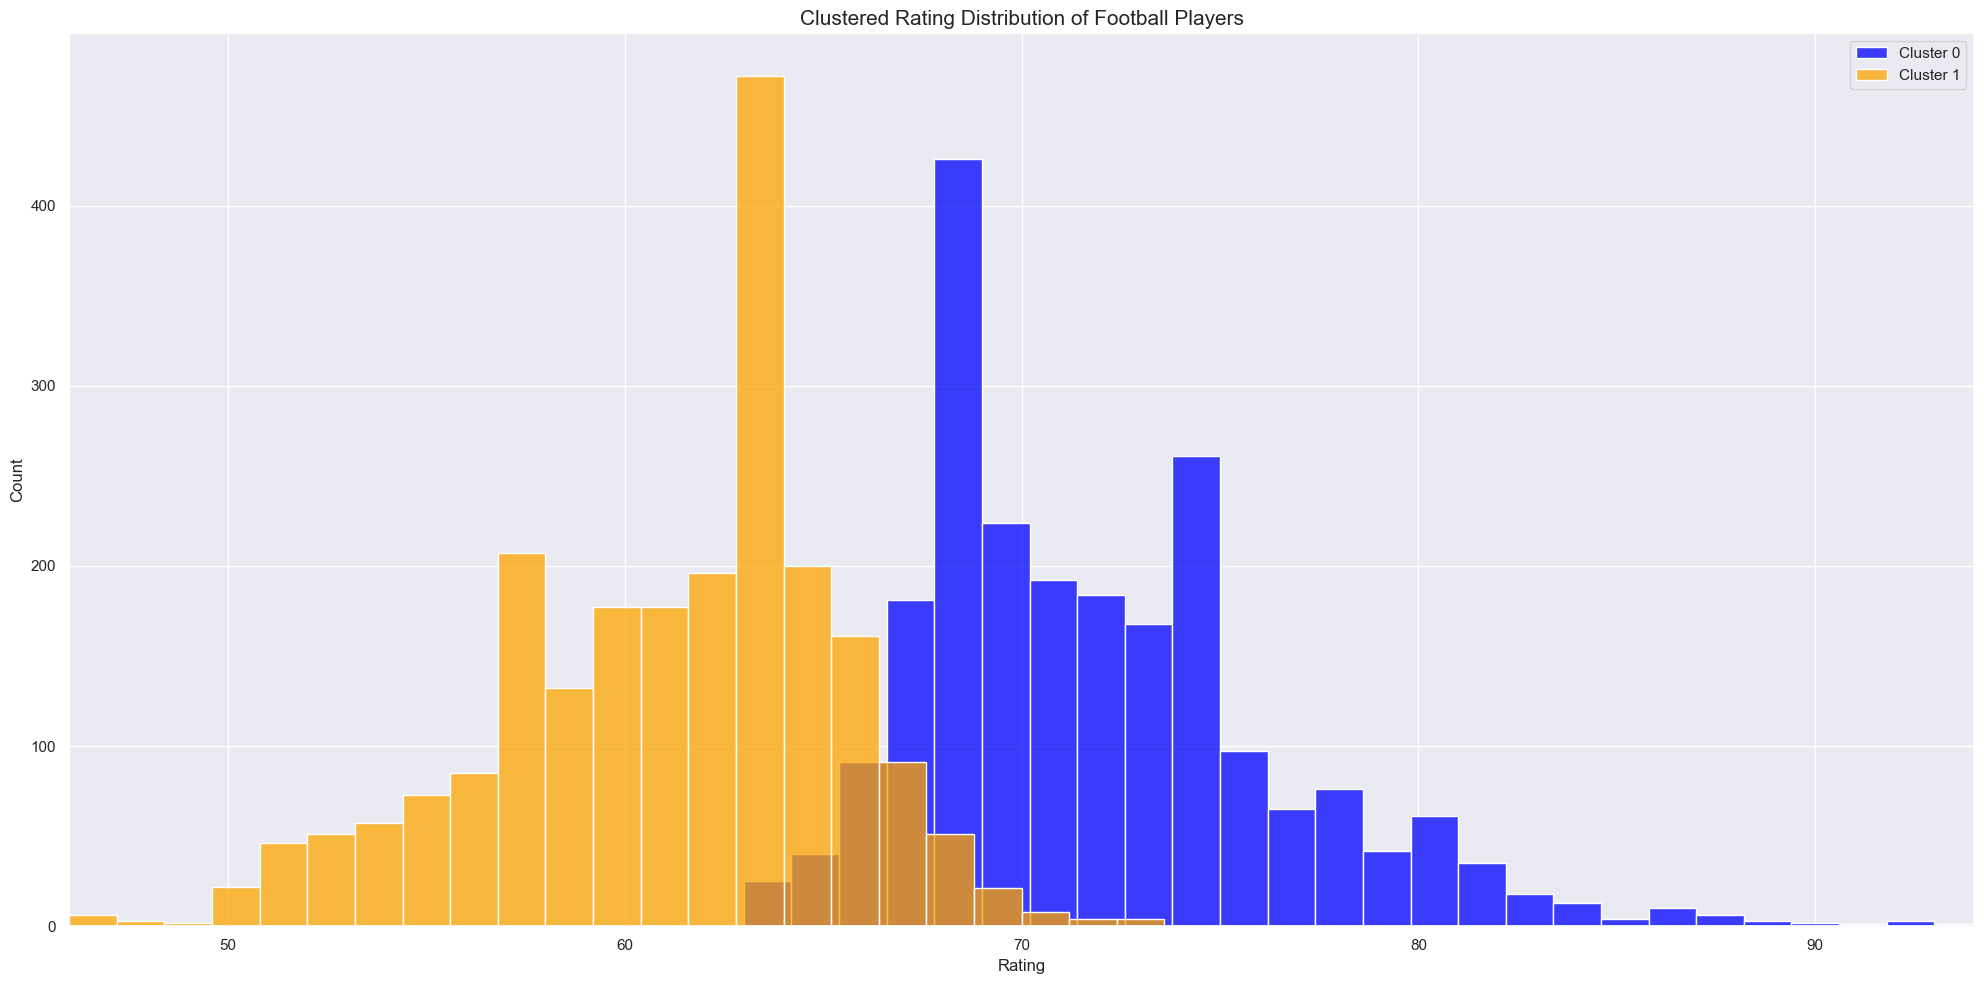

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(figsize=(20, 10))

# Set the bar width
bar_width = 1.2

# Plot the histogram for cluster 0
sns.histplot(newxgb[newxgb['kme_cluster'] == 0]['Rating'], ax=ax, color='blue', label='Cluster 0', binwidth=bar_width)

# Plot the histogram for cluster 1
sns.histplot(newxgb[newxgb['kme_cluster'] == 1]['Rating'], ax=ax, color='orange', label='Cluster 1', binwidth=bar_width)

# Set the x-axis limits to avoid cutoff bars
ax.set_xlim(newxgb['Rating'].min(), newxgb['Rating'].max())

# Add labels and legend
ax.set_xlabel('Rating')
ax.set_ylabel('Count')
ax.legend()

# Set title and adjust layout
plt.title("Clustered Rating Distribution of Football Players", fontsize=15)
plt.tight_layout()

# Show the plot
plt.show()


feature inportance analysis for forward

In [30]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)
def reviewmodel(model,Xtest,Ytest,cv):
    scores = cross_val_score(model, X, y, cv=cv, scoring='r2')
    print('R-squared score :', np.mean(scores))
    y_pred = model.predict(Xtest)
    mse = MSE(Ytest, y_pred)
    print('Mean squared error:', mse)
    r2 = np.mean(scores)
    return r2,mse

In [108]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error as MSE #MSE代表均方误差
from sklearn.linear_model import Ridge, LinearRegression, Lasso#岭回归lasso回归
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR

X = newxgb[newxgb['kme_cluster']==0].iloc[:,:-6]
y = newxgb[newxgb['kme_cluster']==0]['Rating']
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.2,random_state=420)


reg = XGBR(n_estimators=200)
reg.fit(Xtrain, Ytrain)
reg_svr = SVR()
reg_svr.fit(Xtrain, Ytrain)
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(Xtrain, Ytrain)
model_ridge = Ridge(alpha=2)
model_ridge.fit(Xtrain, Ytrain)
model_elastic = ElasticNet()
model_elastic.fit(Xtrain,Ytrain)


reg_rf3 = RFR(n_estimators = 200)

reg_rf3.fit(Xtrain, Ytrain)

modelname =["XGBR","RandomForest","SVR","Lasso","Ridge","Elastic"]
model = []
r23 = []
model.append(reg)
model.append(reg_rf3)
model.append(reg_svr)
model.append(model_lasso)
model.append(model_ridge)
model.append(model_elastic)
for i in model:
    rr,mm = reviewmodel(i,Xtest,Ytest,cv)
    r23.append(rr)
import matplotlib.pyplot as plt
import seaborn as sns
name = ["XGBR", "RandomForest", "SVR", "Lasso", "Ridge", "Elastic"]


R-squared score : 0.9141582919247888
Mean squared error: 1.81860878230036
R-squared score : 0.9148051010773492
Mean squared error: 2.0232146436534624
R-squared score : 0.9164750897602765
Mean squared error: 1.7797245684297571
R-squared score : 0.8844444972351224
Mean squared error: 2.476211892281445
R-squared score : 0.8844447146819927
Mean squared error: 2.4768758369861934
R-squared score : 0.8836518929177355
Mean squared error: 2.452420586633295


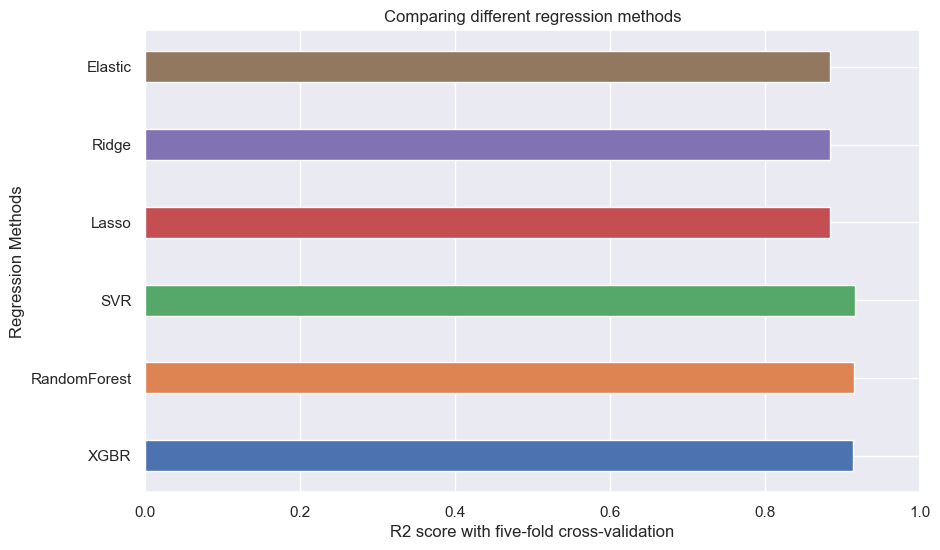

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

name = ["XGBR", "RandomForest", "SVR", "Lasso", "Ridge", "Elastic"]

plt.figure(figsize=[10, 6])

for i, val in enumerate(r23):
    plt.barh(i, val, height=0.4) # Adjust the height as needed

plt.yticks(range(len(name)), name) # Set y-axis ticks and labels
plt.xlim(0, 1) # Set x-axis limits
plt.ylabel("Regression Methods")
plt.xlabel("R2 score with five-fold cross-validation")
plt.title("Comparing different regression methods")

plt.grid(True) # Add gridlines

plt.show()

In [111]:
#We choose permutation importance because SHAP is not appropriate for SVR
from sklearn.inspection import permutation_importance
result = permutation_importance(reg_svr, X, y, n_repeats=10, random_state=42)

# Get feature importances
importances = result.importances_mean

# Print feature importances
print(importances)

[0.04057478 0.05291181 0.0305008  0.1170094  0.05738881 0.08126039
 0.02414746 0.0793392  0.06826944 0.0703371 ]


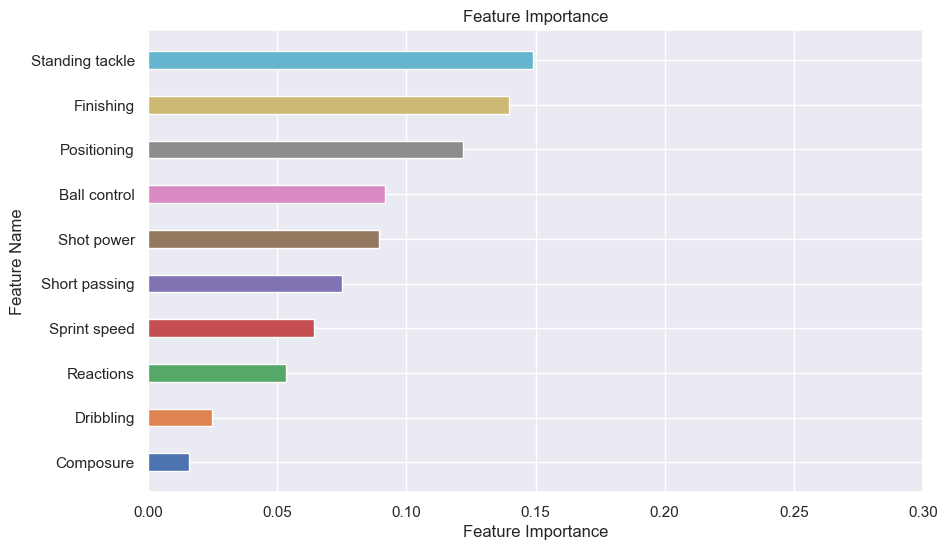

In [343]:
import matplotlib.pyplot as plt
import seaborn as sns

name = X.columns
impxgb = pd.DataFrame({'cols': X.columns, 'imp': importances}).sort_values('imp', ascending = True)

name = impxgb['cols']
imp = impxgb['imp']

plt.figure(figsize=[10, 6])

for i, val in enumerate(imp):
    plt.barh(i, val, height=0.4)  # Adjust the height as needed

plt.yticks(range(len(name)), name)  # Set y-axis ticks and labels
plt.xlim(0, 0.3)  # Set x-axis limits
plt.ylabel("Feature Name")
plt.xlabel("Feature Importance")
plt.title("Feature Importance")

plt.grid(True)  # Add gridlines

plt.show()




In [112]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error as MSE #MSE代表均方误差
from sklearn.linear_model import Ridge, LinearRegression, Lasso#岭回归lasso回归
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR

X = newxgb[newxgb['kme_cluster']==1].iloc[:,:-6]
y = newxgb[newxgb['kme_cluster']==1]['Rating']
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.2,random_state=420)


reg = XGBR(n_estimators=200)
reg.fit(Xtrain, Ytrain)
reg_svr = SVR()
reg_svr.fit(Xtrain, Ytrain)
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(Xtrain, Ytrain)
model_ridge = Ridge(alpha=2)
model_ridge.fit(Xtrain, Ytrain)
model_elastic = ElasticNet()
model_elastic.fit(Xtrain,Ytrain)


reg_rf3 = RFR(n_estimators = 231
          ,max_depth = 12
          ,max_features = 4
          ,min_impurity_decrease = 0
          ,random_state=1412)

reg_rf3.fit(Xtrain, Ytrain)

modelname =["XGBR","RandomForest","SVR","Lasso","Ridge","Elastic"]
model = []
r23 = []
model.append(reg)
model.append(reg_rf3)
model.append(reg_svr)
model.append(model_lasso)
model.append(model_ridge)
model.append(model_elastic)
for i in model:
    rr,mm = reviewmodel(i,Xtest,Ytest,cv)
    r23.append(rr)
import matplotlib.pyplot as plt
import seaborn as sns
name = ["XGBR", "RandomForest", "SVR", "Lasso", "Ridge", "Elastic"]


R-squared score : 0.8739039187722912
Mean squared error: 2.457803955491464
R-squared score : 0.8718495045897162
Mean squared error: 2.6475429578906566
R-squared score : 0.8934549088483121
Mean squared error: 2.195599274711321
R-squared score : 0.7799591542093939
Mean squared error: 4.43480776921787
R-squared score : 0.7799574297090512
Mean squared error: 4.433825612350492
R-squared score : 0.7791143154950602
Mean squared error: 4.49225348829268


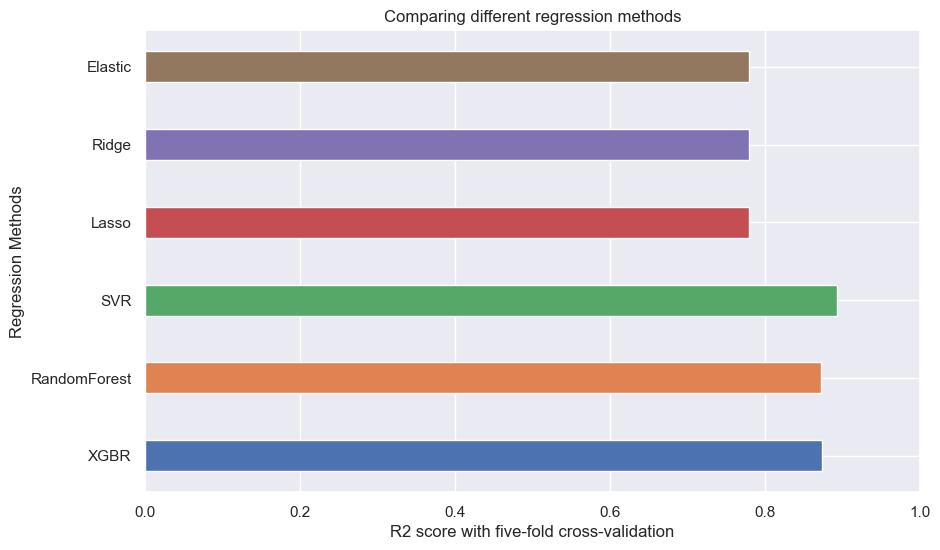

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

name = ["XGBR", "RandomForest", "SVR", "Lasso", "Ridge", "Elastic"]

plt.figure(figsize=[10, 6])

for i, val in enumerate(r23):
    plt.barh(i, val, height=0.4) # Adjust the height as needed

plt.yticks(range(len(name)), name) # Set y-axis ticks and labels
plt.xlim(0, 1) # Set x-axis limits
plt.ylabel("Regression Methods")
plt.xlabel("R2 score with five-fold cross-validation")
plt.title("Comparing different regression methods")

plt.grid(True) # Add gridlines

plt.show()

In [114]:
from sklearn.inspection import permutation_importance
result = permutation_importance(reg_svr, X, y, n_repeats=10, random_state=42)

# Get feature importances
importances = result.importances_mean

# Print feature importances
print(importances)

[0.06265954 0.0221043  0.14287457 0.14773882 0.08150603 0.07486793
 0.01971542 0.11812759 0.04998534 0.09967457]


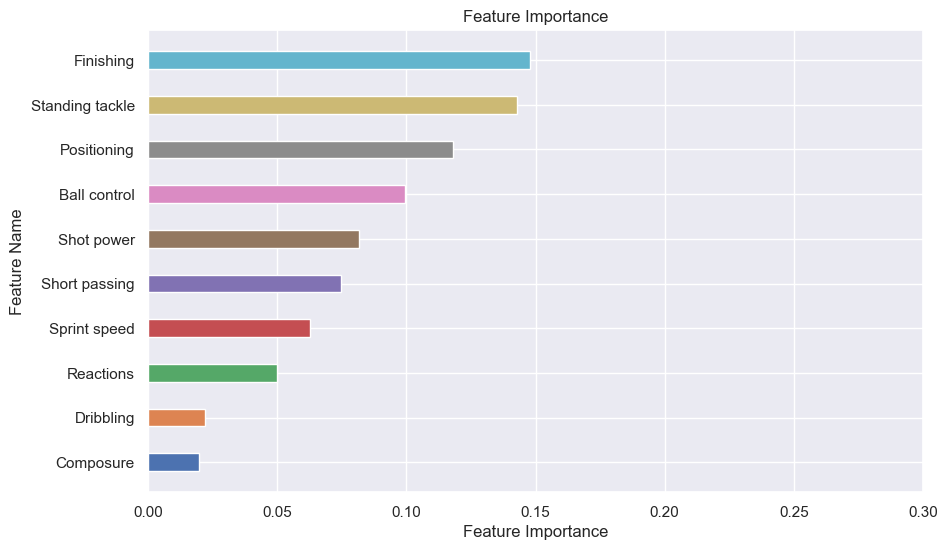

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

name = X.columns
impxgb = pd.DataFrame({'cols': X.columns, 'imp': importances}).sort_values('imp', ascending = True)

name = impxgb['cols']
imp = impxgb['imp']

plt.figure(figsize=[10, 6])

for i, val in enumerate(imp):
    plt.barh(i, val, height=0.4)  # Adjust the height as needed

plt.yticks(range(len(name)), name)  # Set y-axis ticks and labels
plt.xlim(0, 0.3)  # Set x-axis limits
plt.ylabel("Feature Name")
plt.xlabel("Feature Importance")
plt.title("Feature Importance")

plt.grid(True)  # Add gridlines

plt.show()




middle feature selection

In [116]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(mx_avg,my,test_size=0.2,random_state=420)
reg = XGBR(n_estimators=200).fit(Xtrain,Ytrain) #训练
reg.predict(Xtest) #传统接口predict
print("R^2",reg.score(Xtest,Ytest))#R^2评估指标
print("MSE",MSE(Ytest,reg.predict(Xtest)))
print("importance",reg.feature_importances_)

R^2 0.9647622389191999
MSE 533255.2603441046
importance [0.00227927 0.00166862 0.00150454 0.00081482 0.49858406 0.05565912
 0.00776146 0.00111034 0.0154084  0.02175601 0.00103017 0.01037096
 0.01499893 0.00134114 0.00292008 0.01306961 0.00867568 0.00096642
 0.02972931 0.19365928 0.02650983 0.01216791 0.01245785 0.01118601
 0.01026874 0.03223665 0.00356532 0.00686559 0.00143385]


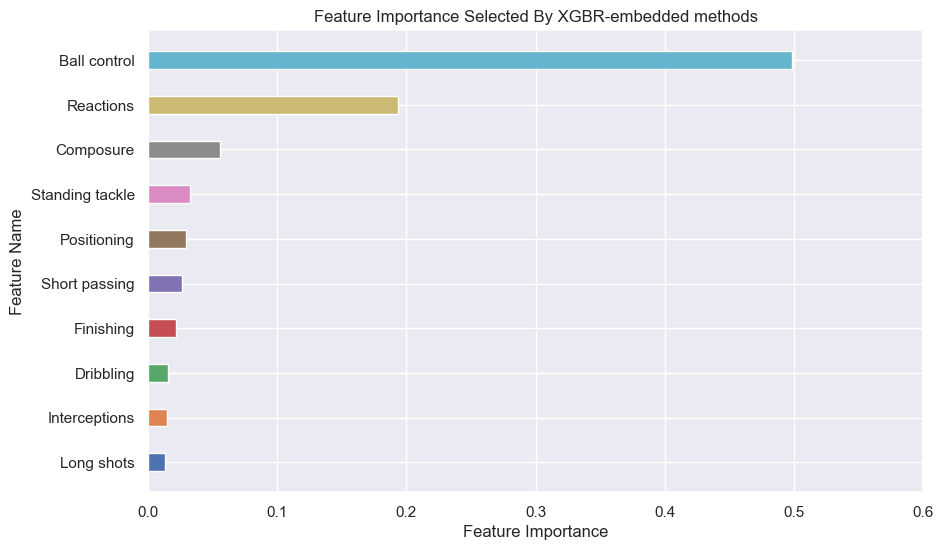

In [117]:
import seaborn as sns
sns.set()
model = reg

import matplotlib.pyplot as plt
import seaborn as sns

name = mx_avg.columns
impxgb = pd.DataFrame({'cols': mx_avg.columns, 'imp': model.feature_importances_}).sort_values('imp', ascending = True)

name = impxgb['cols'][-10:]
imp = impxgb['imp'][-10:]

plt.figure(figsize=[10, 6])

for i, val in enumerate(imp):
    plt.barh(i, val, height=0.4)  # Adjust the height as needed

plt.yticks(range(len(name)), name)  # Set y-axis ticks and labels
plt.xlim(0, 0.6)  # Set x-axis limits
plt.ylabel("Feature Name")
plt.xlabel("Feature Importance")
plt.title("Feature Importance Selected By XGBR-embedded methods")

plt.grid(True)  # Add gridlines

plt.show()




middle factor analysis

In [121]:
newxgb =  mx_avg.loc[:,list(impxgb['cols'][-10:])].copy()
newxgb['Rating'] = my['rating']

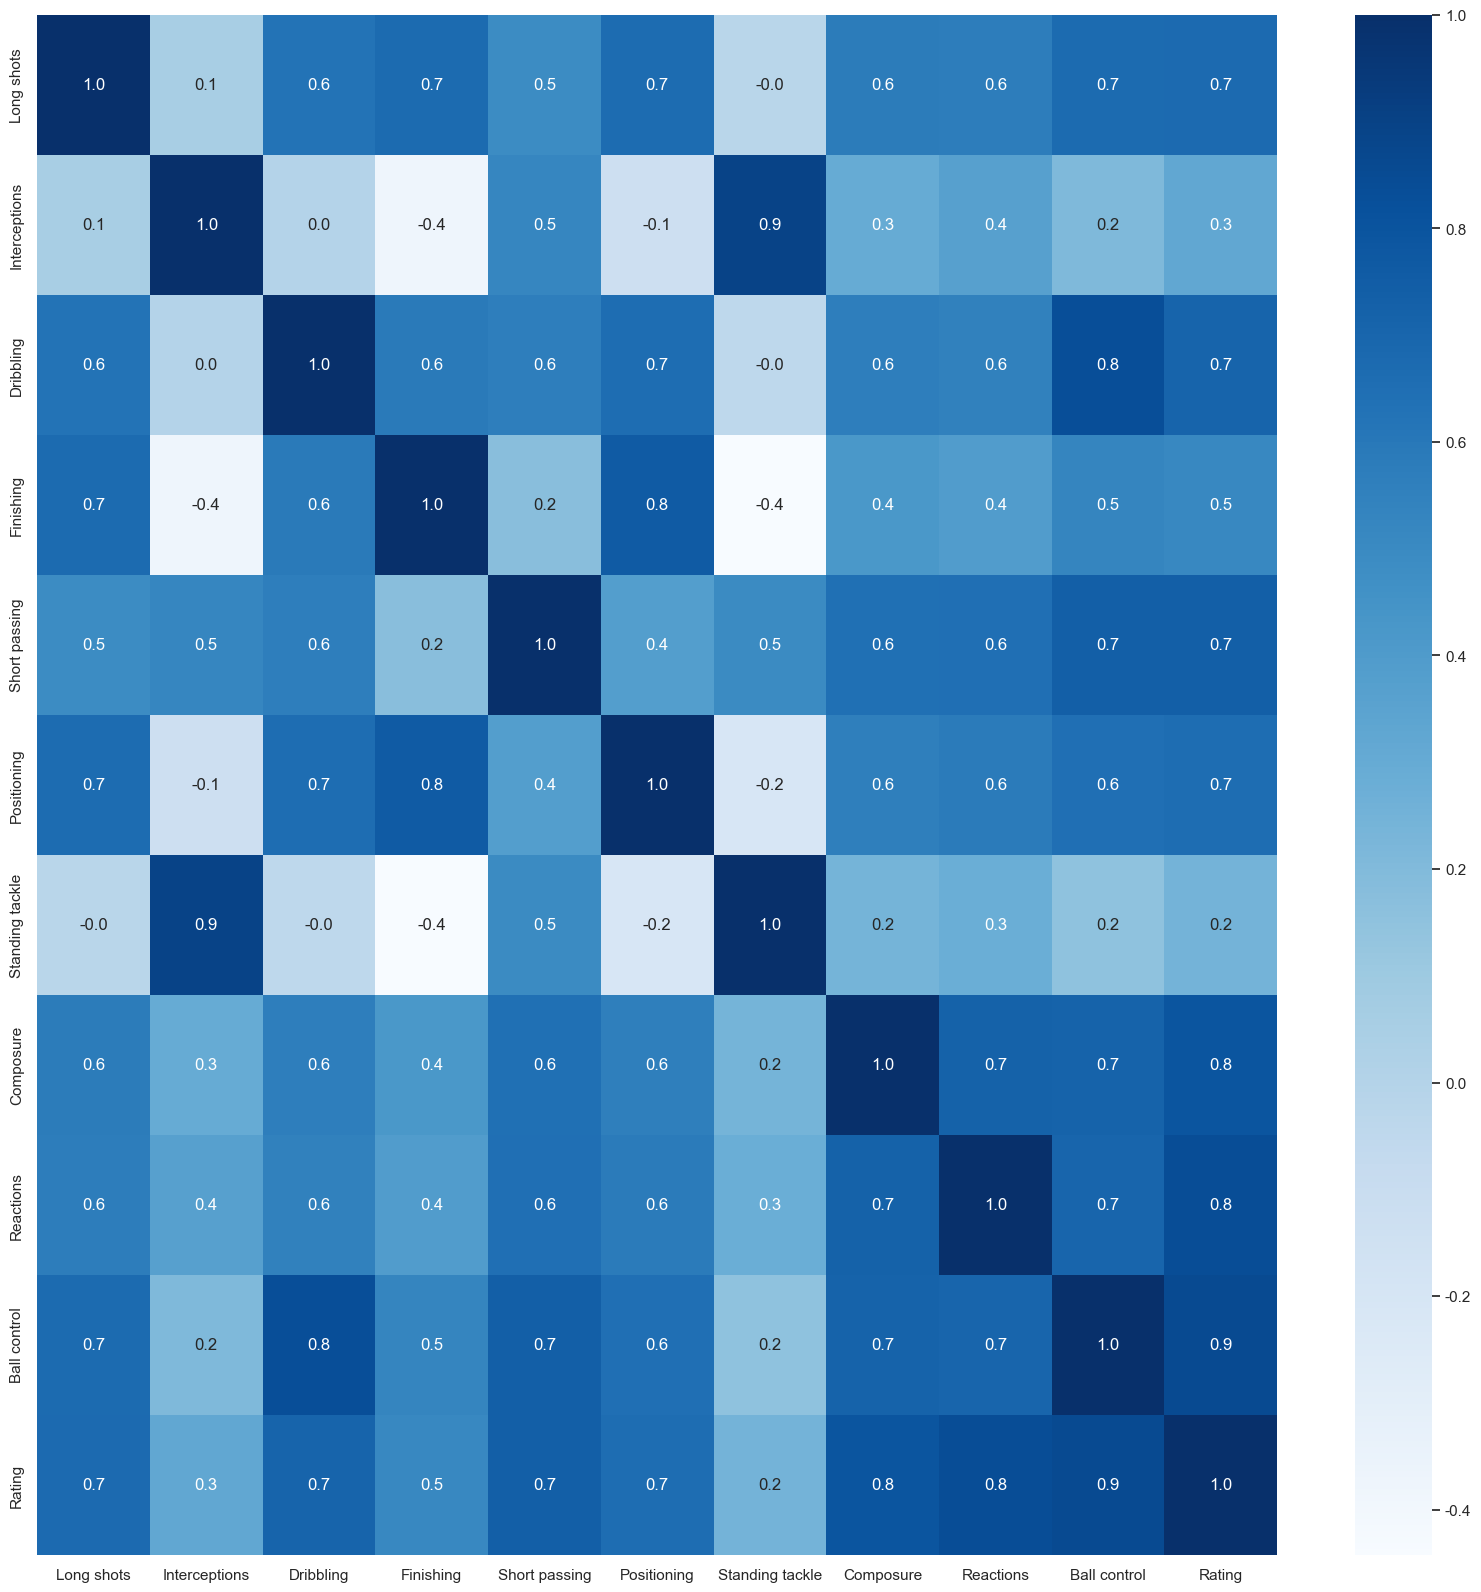

In [122]:
plt.figure(figsize=(20, 20))

# 绘制热力图，并显示数字（保留一位小数）
sns.heatmap(newxgb.corr(), annot=True, fmt='.1f', cmap='Blues')

# 显示图像
plt.show()

In [123]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
fac = newxgb.iloc[:,:-1]
chi_square_value, p_value = calculate_bartlett_sphericity(fac)
chi_square_value, p_value

(96173.93097862916, 0.0)

In [124]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(fac)
kmo_model

0.8716710391088592

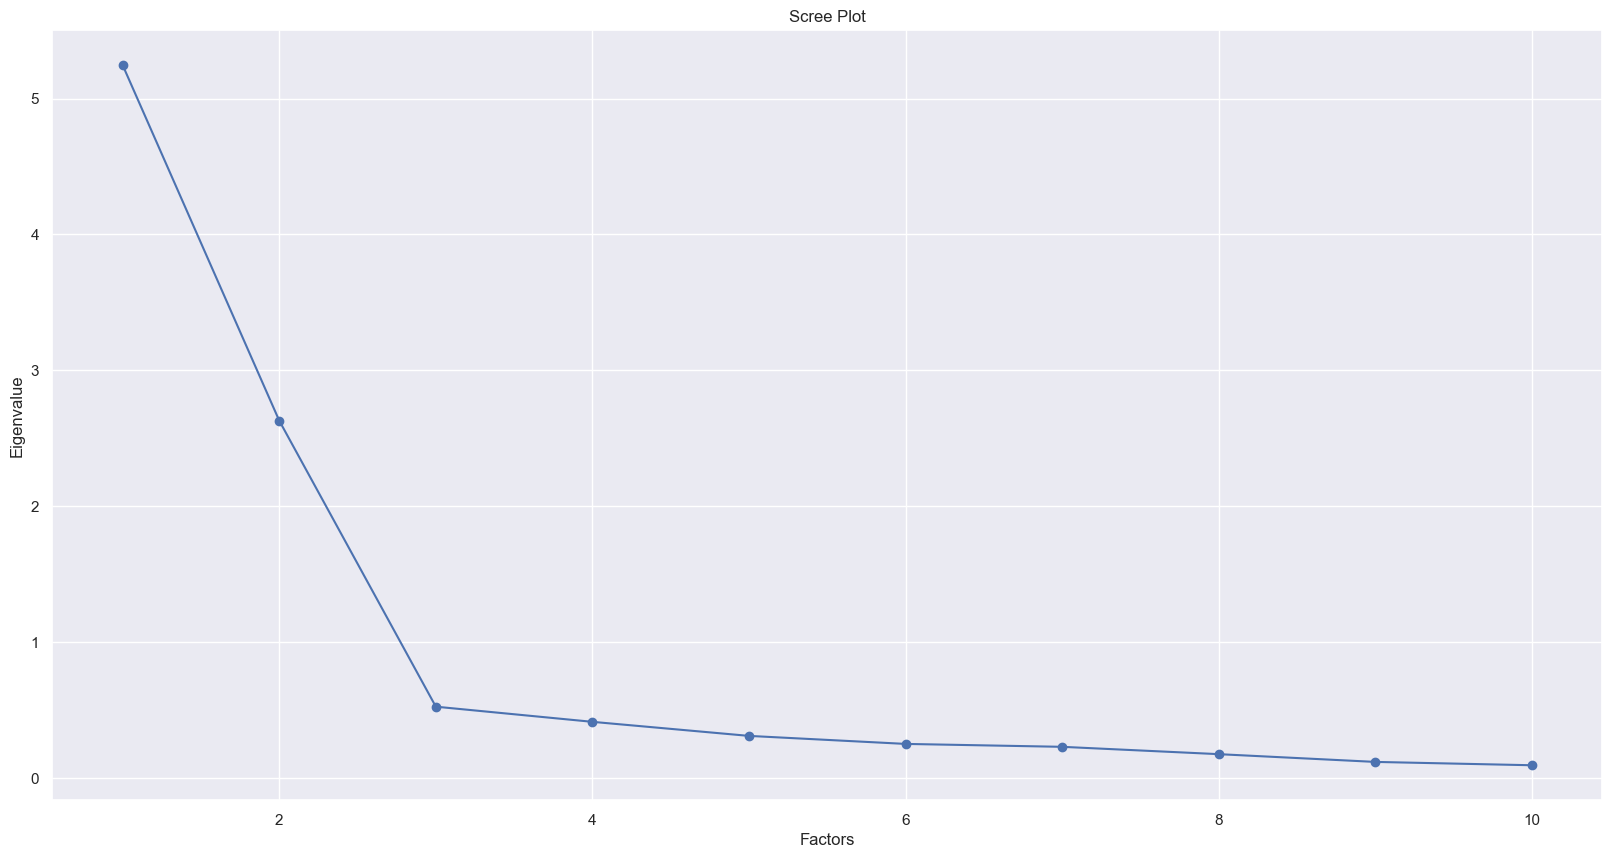

In [131]:
# 同样的数据绘制散点图和折线图
plt.figure(figsize=[20,10])
sns.set()
plt.scatter(range(1, fac.shape[1] + 1), ev)
plt.plot(range(1, fac.shape[1] + 1), ev)
 
# 显示图的标题和xy轴的名字
# 最好使用英文，中文可能乱码
plt.title("Scree Plot")  
plt.xlabel("Factors")
plt.ylabel("Eigenvalue")
plt.grid(True)  # Add gridlines
plt.show()  # 显示图形

In [132]:
# 选择方式： varimax 方差最大化
# 选择固定因子为 2 个
faa_two = FactorAnalyzer(3,rotation='varimax')
faa_two.fit(fac)

FactorAnalyzer(rotation='varimax', rotation_kwargs={})

In [133]:
eigenvalues = faa_two.get_eigenvalues()
variance_explained = np.cumsum(eigenvalues[0]) / np.sum(eigenvalues[0])
print(variance_explained)
print("累计方差解释：",variance_explained[2])

[0.52447447 0.78745239 0.8400461  0.88149218 0.91259586 0.93779794
 0.96086313 0.97853165 0.99049461 1.        ]
累计方差解释： 0.8400460961406272


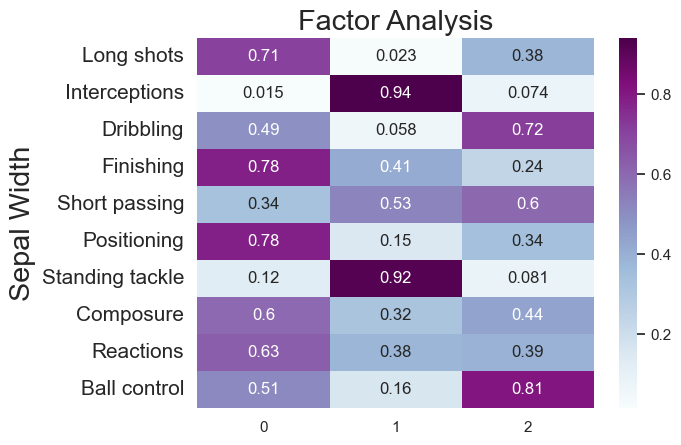

In [134]:
df1 = pd.DataFrame(np.abs(faa_two.loadings_),index=fac.columns)
# 绘图
ax = sns.heatmap(df1, annot=True, cmap="BuPu")
 
# 设置y轴字体大小
ax.yaxis.set_tick_params(labelsize=15)
plt.title("Factor Analysis", fontsize="xx-large")
 
# 设置y轴标签
plt.ylabel("Sepal Width", fontsize="xx-large")
# 显示图片
plt.show()

classification for middle

In [135]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import Birch
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

In [136]:
X = newxgb
model = AgglomerativeClustering(n_clusters=3)
agg_yhat = model.fit_predict(X)


In [137]:
model = Birch(threshold=0.01, n_clusters=3)
model.fit(X)
bir_yhat = model.predict(X)

In [138]:
model = MiniBatchKMeans(n_clusters=3)
model.fit(X)
mini_yhat = model.predict(X)

In [139]:
model = GaussianMixture(n_components=3)
model.fit(X)
gau_yhat = model.predict(X)

In [140]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)


KMeans(n_clusters=3)

In [141]:
newxgb['kme_cluster'] = kmeans.labels_
newxgb['agg'] = agg_yhat
newxgb['bir'] =bir_yhat 
newxgb['mini'] = mini_yhat 
newxgb['gau'] = gau_yhat

In [142]:
from scipy.spatial import distance

def calculate_cluster_distances(data, cluster_column):
    cluster_labels = data[cluster_column].unique()
    cluster_centers = []
    for cluster_label in cluster_labels:
        cluster_points = data[data[cluster_column] == cluster_label]
        cluster_center = np.mean(cluster_points, axis=0)
        cluster_centers.append(cluster_center)
    cluster_centers = np.array(cluster_centers)
    result = [0] * len(cluster_labels)
    for i, cluster_label in enumerate(cluster_labels):
        cluster_points = data[data[cluster_column] == cluster_label]
        for _, row in cluster_points.iterrows():
            row_array = row.values
            distance_to_center = distance.euclidean(row_array, cluster_centers[i])
            result[i] += distance_to_center
    return np.sum(result)


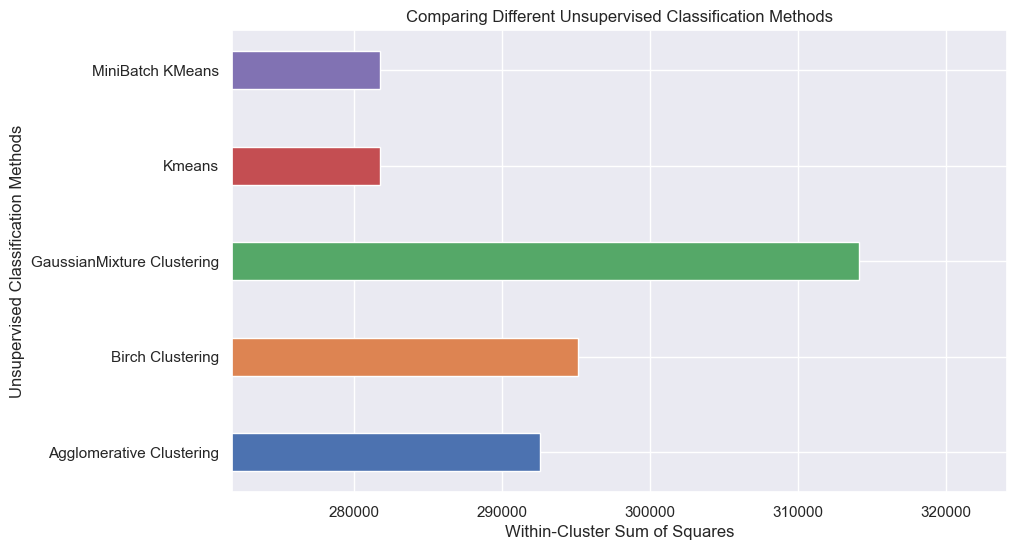

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns

name = ["Agglomerative Clustering", "Birch Clustering", "GaussianMixture Clustering", "Kmeans", "MiniBatch KMeans"]

import matplotlib.pyplot as plt
import seaborn as sns



plt.figure(figsize=[10, 6])

for i, val in enumerate(result):
    plt.barh(i, val, height=0.4)  # Adjust the height as needed

plt.yticks(range(len(name)), name)  # Set y-axis ticks and labels
plt.xlim(min(result)-10000, max(result)+10000)  # Set x-axis limits
plt.xlabel("Within-Cluster Sum of Squares")
plt.ylabel("Unsupervised Classification Methods")
plt.title("Comparing Different Unsupervised Classification Methods")

plt.grid(True)  # Add gridlines

plt.show()





In [145]:
newxgb.groupby(newxgb['kme_cluster'])['Rating'].mean()

kme_cluster
0    71.527962
1    66.083974
2    60.880638
Name: Rating, dtype: float64

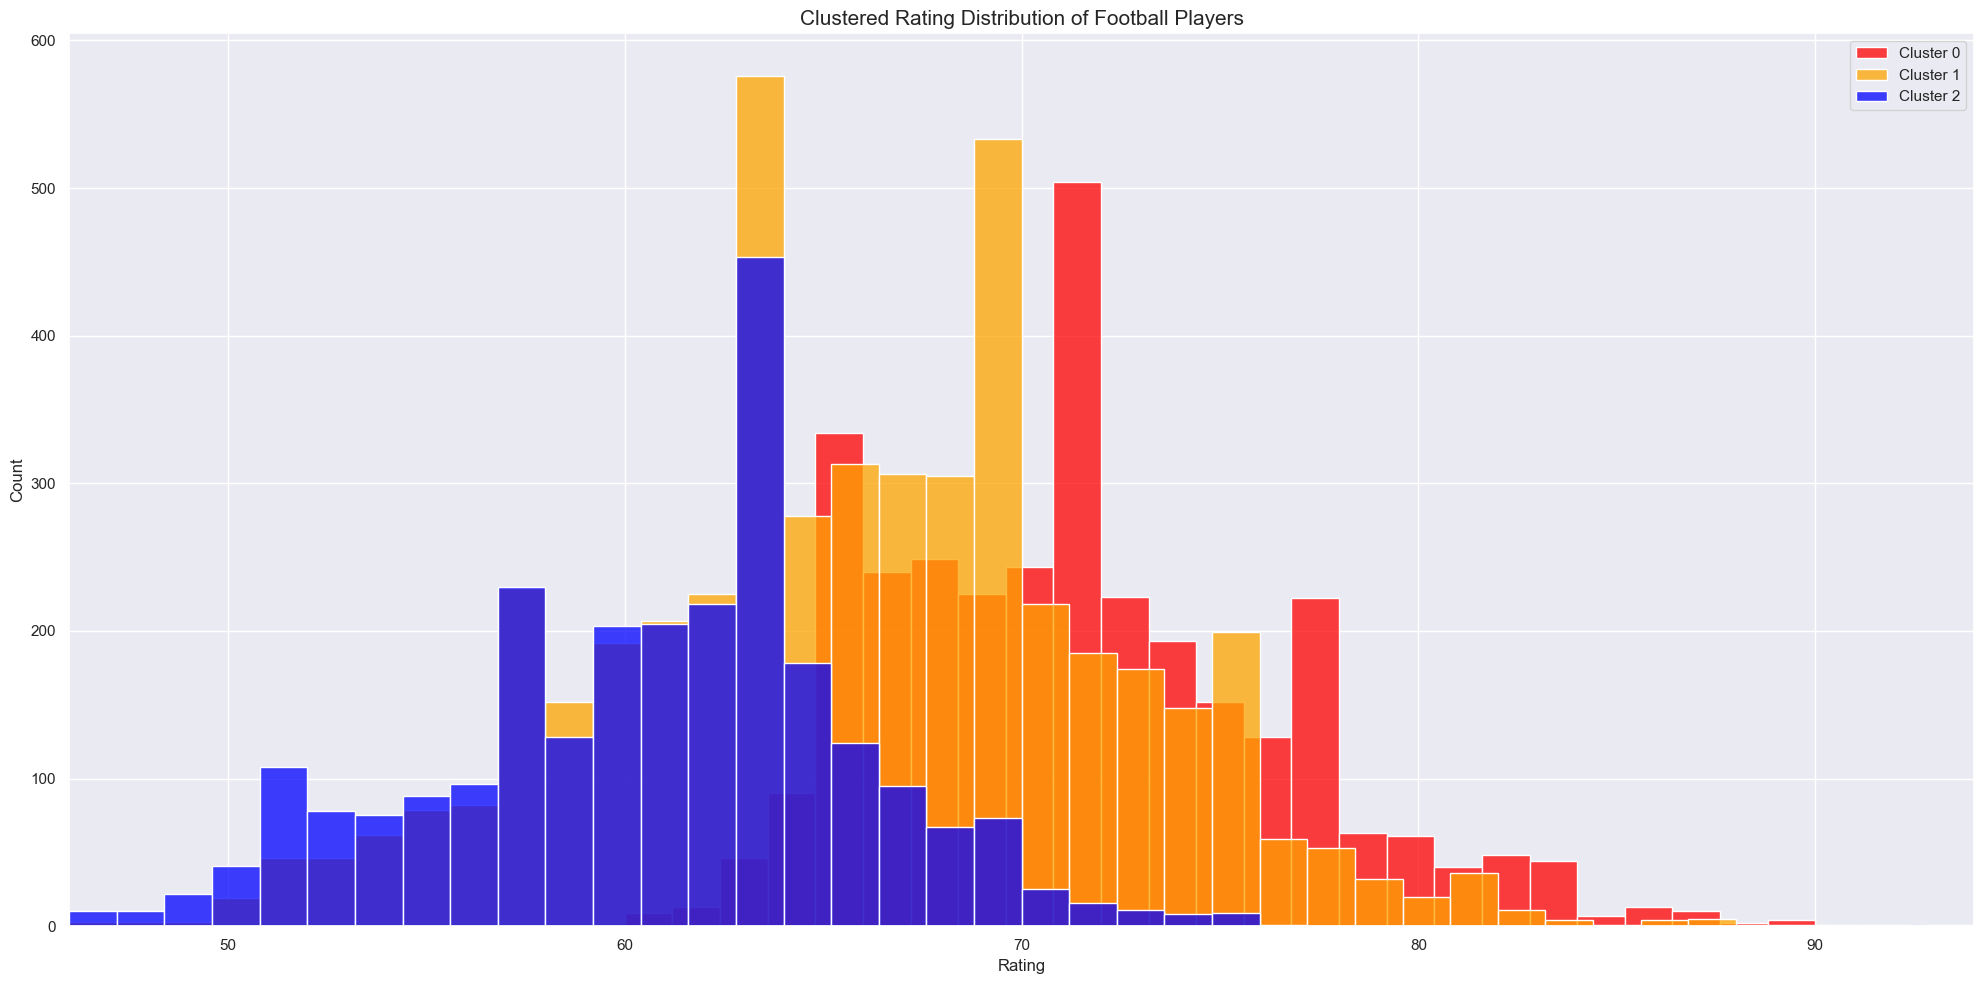

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(figsize=(20, 10))

# Set the bar width
bar_width = 1.2

# Plot the histogram for cluster 0
sns.histplot(newxgb[newxgb['kme_cluster'] == 0]['Rating'], ax=ax, color='red', label='Cluster 0', binwidth=bar_width)

# Plot the histogram for cluster 1
sns.histplot(newxgb[newxgb['kme_cluster'] == 1]['Rating'], ax=ax, color='orange', label='Cluster 1', binwidth=bar_width)
sns.histplot(newxgb[newxgb['kme_cluster'] == 2]['Rating'], ax=ax, color='blue', label='Cluster 2', binwidth=bar_width)

# Set the x-axis limits to avoid cutoff bars
ax.set_xlim(newxgb['Rating'].min(), newxgb['Rating'].max())

# Add labels and legend
ax.set_xlabel('Rating')
ax.set_ylabel('Count')
ax.legend()

# Set title and adjust layout
plt.title("Clustered Rating Distribution of Football Players", fontsize=15)
plt.tight_layout()

# Show the plot
plt.show()


feature inportance analysis for middle

In [149]:


X = newxgb[newxgb['kme_cluster']==0].iloc[:,:-6]
y = newxgb[newxgb['kme_cluster']==0]['Rating']
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.2,random_state=420)


reg = XGBR(n_estimators=200)
reg.fit(Xtrain, Ytrain)
reg_svr = SVR()
reg_svr.fit(Xtrain, Ytrain)
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(Xtrain, Ytrain)
model_ridge = Ridge(alpha=2)
model_ridge.fit(Xtrain, Ytrain)
model_elastic = ElasticNet()
model_elastic.fit(Xtrain,Ytrain)


reg_rf3 = RFR(n_estimators = 200)

reg_rf3.fit(Xtrain, Ytrain)

modelname =["XGBR","RandomForest","SVR","Lasso","Ridge","Elastic"]
model = []
r23 = []
model.append(reg)
model.append(reg_rf3)
model.append(reg_svr)
model.append(model_lasso)
model.append(model_ridge)
model.append(model_elastic)
for i in model:
    rr,mm = reviewmodel(i,Xtest,Ytest,cv)
    r23.append(rr)
import matplotlib.pyplot as plt
import seaborn as sns
name = ["XGBR", "RandomForest", "SVR", "Lasso", "Ridge", "Elastic"]


R-squared score : 0.9059896677365014
Mean squared error: 2.282936571304266
R-squared score : 0.9186319997847121
Mean squared error: 1.9928504146348511
R-squared score : 0.9132183329593703
Mean squared error: 2.095113817563302
R-squared score : 0.8449636408966162
Mean squared error: 3.7455976803281534
R-squared score : 0.8449627862322882
Mean squared error: 3.745582848852858
R-squared score : 0.844444004496449
Mean squared error: 3.7594787074003286


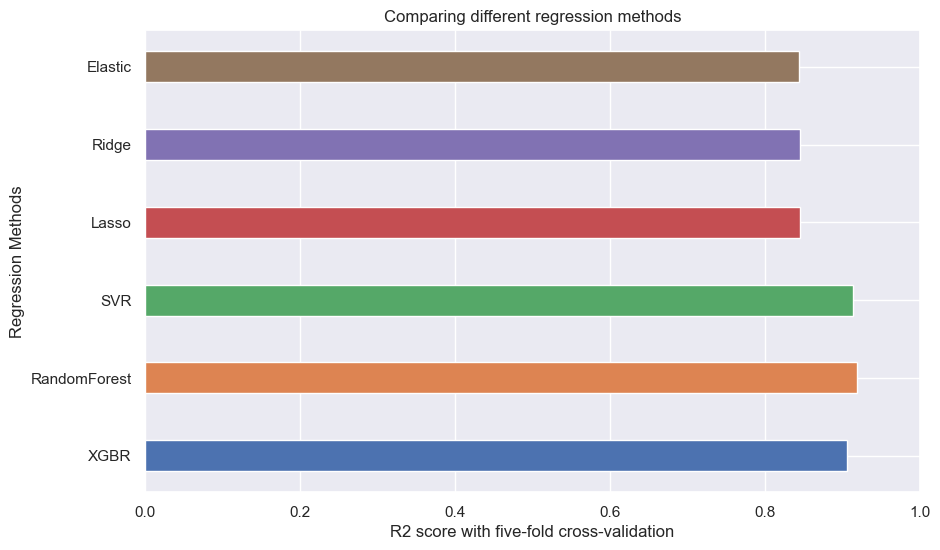

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns

name = ["XGBR", "RandomForest", "SVR", "Lasso", "Ridge", "Elastic"]

plt.figure(figsize=[10, 6])

for i, val in enumerate(r23):
    plt.barh(i, val, height=0.4) # Adjust the height as needed

plt.yticks(range(len(name)), name) # Set y-axis ticks and labels
plt.xlim(0, 1) # Set x-axis limits
plt.ylabel("Regression Methods")
plt.xlabel("R2 score with five-fold cross-validation")
plt.title("Comparing different regression methods")

plt.grid(True) # Add gridlines

plt.show()

In [35]:
explainer = shap.Explainer(reg_rf3)
shap_values = explainer(X)

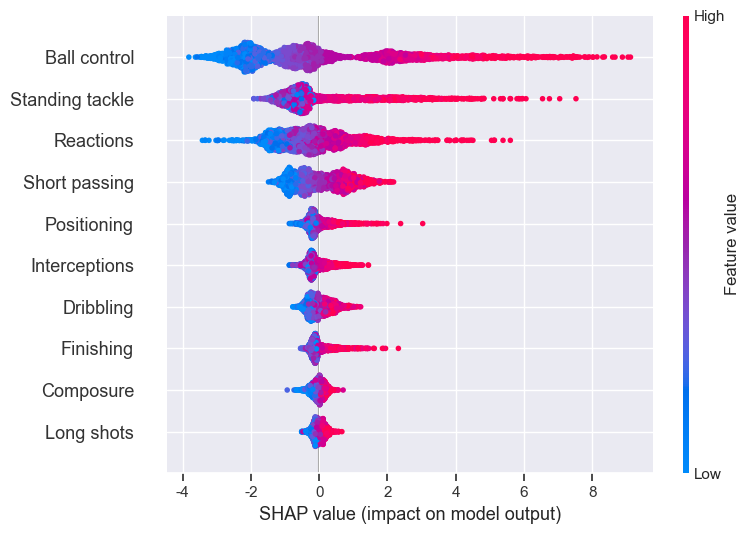

In [36]:
shap.summary_plot(shap_values, X)

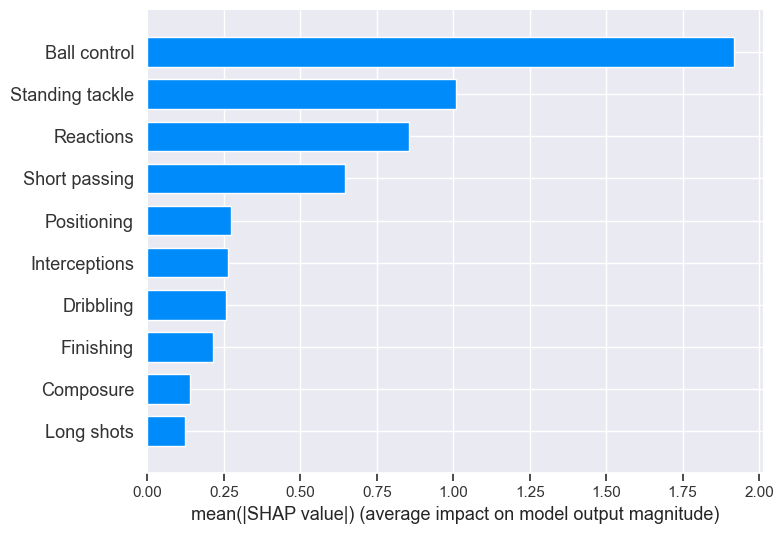

In [37]:
shap.summary_plot(shap_values, X, plot_type="bar")

In [44]:
shap_values_mean = shap_values.abs.mean(axis=0)
shap_values_mean

.values =
array([1.91754119, 0.85442537, 0.13847478, 1.01045753, 0.27490759,
       0.64776718, 0.21461323, 0.25621266, 0.26486611, 0.12448165])

.base_values =
array([71.4954201])

.data =
array([71.49549498, 69.26858518, 68.51306448, 62.98463131, 64.20314558,
       71.98589924, 58.1967854 , 68.98272613, 63.1991223 , 65.03492767])

In [152]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error as MSE #MSE代表均方误差
from sklearn.linear_model import Ridge, LinearRegression, Lasso#岭回归lasso回归
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR

X = newxgb[newxgb['kme_cluster']==1].iloc[:,:-6]
y = newxgb[newxgb['kme_cluster']==1]['Rating']
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.2,random_state=420)


reg = XGBR(n_estimators=200)
reg.fit(Xtrain, Ytrain)
reg_svr = SVR()
reg_svr.fit(Xtrain, Ytrain)
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(Xtrain, Ytrain)
model_ridge = Ridge(alpha=2)
model_ridge.fit(Xtrain, Ytrain)
model_elastic = ElasticNet()
model_elastic.fit(Xtrain,Ytrain)


reg_rf3 = RFR(n_estimators = 200)

reg_rf3.fit(Xtrain, Ytrain)

modelname =["XGBR","RandomForest","SVR","Lasso","Ridge","Elastic"]
model = []
r23 = []
model.append(reg)
model.append(reg_rf3)
model.append(reg_svr)
model.append(model_lasso)
model.append(model_ridge)
model.append(model_elastic)
for i in model:
    rr,mm = reviewmodel(i,Xtest,Ytest,cv)
    r23.append(rr)
import matplotlib.pyplot as plt
import seaborn as sns
name = ["XGBR", "RandomForest", "SVR", "Lasso", "Ridge", "Elastic"]


R-squared score : 0.9324159693041267
Mean squared error: 2.912270556596031
R-squared score : 0.9381752304277601
Mean squared error: 2.6800434219885774
R-squared score : 0.9384276152210376
Mean squared error: 2.6225104600013727
R-squared score : 0.935875437196021
Mean squared error: 2.646750343445444
R-squared score : 0.935872521056709
Mean squared error: 2.6465163452294065
R-squared score : 0.9357092729105172
Mean squared error: 2.6693463398865185


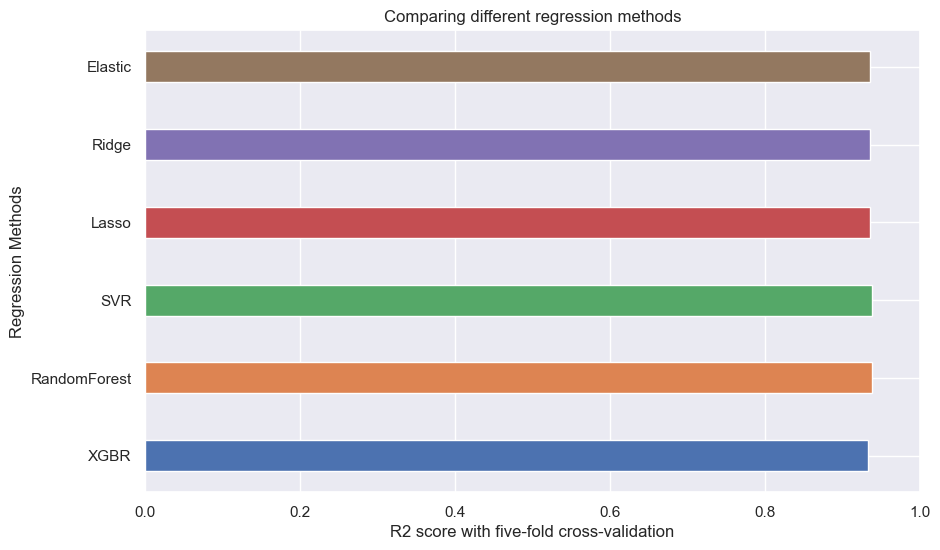

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns

name = ["XGBR", "RandomForest", "SVR", "Lasso", "Ridge", "Elastic"]

plt.figure(figsize=[10, 6])

for i, val in enumerate(r23):
    plt.barh(i, val, height=0.4) # Adjust the height as needed

plt.yticks(range(len(name)), name) # Set y-axis ticks and labels
plt.xlim(0, 1) # Set x-axis limits
plt.ylabel("Regression Methods")
plt.xlabel("R2 score with five-fold cross-validation")
plt.title("Comparing different regression methods")

plt.grid(True) # Add gridlines

plt.show()

In [47]:
from sklearn.inspection import permutation_importance
result = permutation_importance(reg_svr, X, y, n_repeats=10, random_state=42)

# Get feature importances
importances = result.importances_mean

# Print feature importances
print(importances)

[0.08603503 0.05636099 0.03034187 0.00336172 0.11841173 0.05435484
 0.08631661 0.08303316 0.0061873  0.02194193]


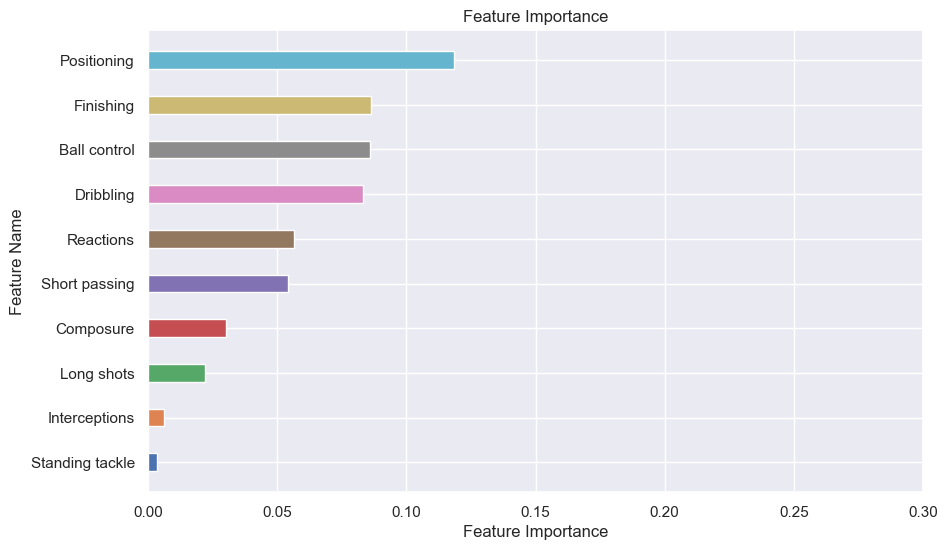

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

name = X.columns
impxgb = pd.DataFrame({'cols': X.columns, 'imp': importances}).sort_values('imp', ascending = True)

name = impxgb['cols']
imp = impxgb['imp']

plt.figure(figsize=[10, 6])

for i, val in enumerate(imp):
    plt.barh(i, val, height=0.4)  # Adjust the height as needed

plt.yticks(range(len(name)), name)  # Set y-axis ticks and labels
plt.xlim(0, 0.3)  # Set x-axis limits
plt.ylabel("Feature Name")
plt.xlabel("Feature Importance")
plt.title("Feature Importance")

plt.grid(True)  # Add gridlines

plt.show()




In [154]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error as MSE #MSE代表均方误差
from sklearn.linear_model import Ridge, LinearRegression, Lasso#岭回归lasso回归
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR

X = newxgb[newxgb['kme_cluster']==2].iloc[:,:-6]
y = newxgb[newxgb['kme_cluster']==2]['Rating']
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.2,random_state=420)


reg = XGBR(n_estimators=200)
reg.fit(Xtrain, Ytrain)
reg_svr = SVR()
reg_svr.fit(Xtrain, Ytrain)
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(Xtrain, Ytrain)
model_ridge = Ridge(alpha=2)
model_ridge.fit(Xtrain, Ytrain)
model_elastic = ElasticNet()
model_elastic.fit(Xtrain,Ytrain)


reg_rf3 = RFR(n_estimators = 200)

reg_rf3.fit(Xtrain, Ytrain)

modelname =["XGBR","RandomForest","SVR","Lasso","Ridge","Elastic"]
model = []
r23 = []
model.append(reg)
model.append(reg_rf3)
model.append(reg_svr)
model.append(model_lasso)
model.append(model_ridge)
model.append(model_elastic)
for i in model:
    rr,mm = reviewmodel(i,Xtest,Ytest,cv)
    r23.append(rr)
import matplotlib.pyplot as plt
import seaborn as sns
name = ["XGBR", "RandomForest", "SVR", "Lasso", "Ridge", "Elastic"]


R-squared score : 0.8593794723275044
Mean squared error: 4.0327201167690605
R-squared score : 0.8731561789941733
Mean squared error: 3.497623495145631
R-squared score : 0.8806710071922839
Mean squared error: 3.4439515209876763
R-squared score : 0.7801689077046072
Mean squared error: 5.6843836714517
R-squared score : 0.7801563201449525
Mean squared error: 5.683881541319023
R-squared score : 0.7800153872090541
Mean squared error: 5.748029254826463


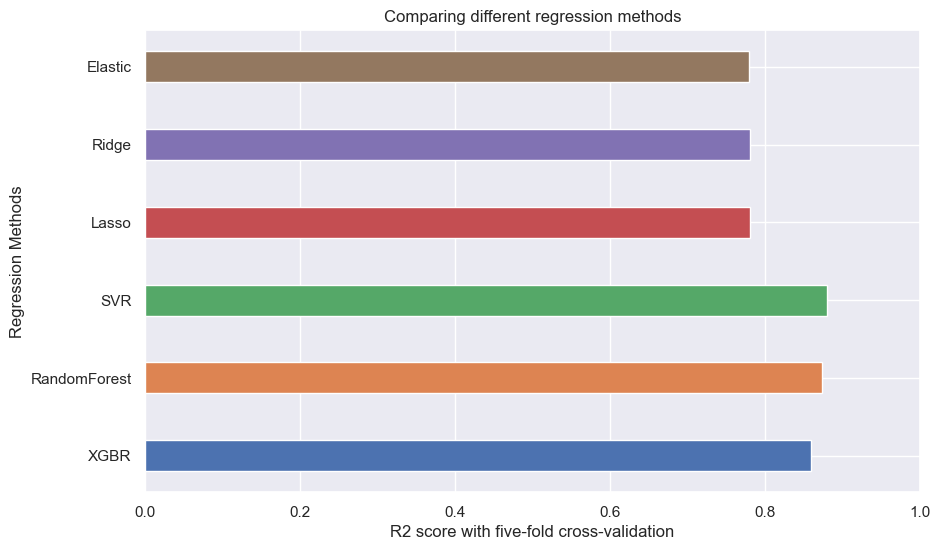

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns

name = ["XGBR", "RandomForest", "SVR", "Lasso", "Ridge", "Elastic"]

plt.figure(figsize=[10, 6])

for i, val in enumerate(r23):
    plt.barh(i, val, height=0.4) # Adjust the height as needed

plt.yticks(range(len(name)), name) # Set y-axis ticks and labels
plt.xlim(0, 1) # Set x-axis limits
plt.ylabel("Regression Methods")
plt.xlabel("R2 score with five-fold cross-validation")
plt.title("Comparing different regression methods")

plt.grid(True) # Add gridlines

plt.show()

In [51]:
from sklearn.inspection import permutation_importance
result = permutation_importance(reg_svr, X, y, n_repeats=10, random_state=42)

# Get feature importances
importances = result.importances_mean

# Print feature importances
print(importances)

[0.06874614 0.05722798 0.02568105 0.27940568 0.04646183 0.04451865
 0.02087281 0.06195656 0.18931747 0.02342297]


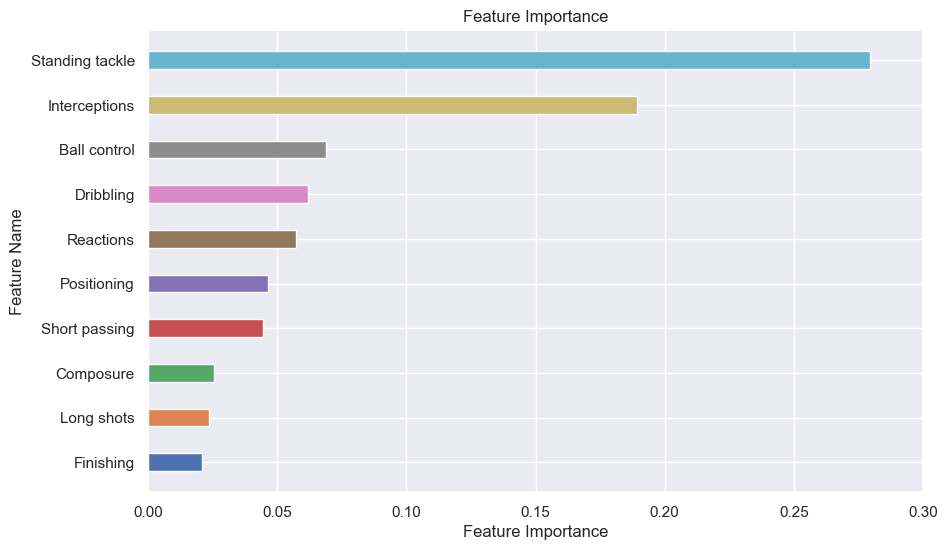

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

name = X.columns
impxgb = pd.DataFrame({'cols': X.columns, 'imp': importances}).sort_values('imp', ascending = True)

name = impxgb['cols']
imp = impxgb['imp']

plt.figure(figsize=[10, 6])

for i, val in enumerate(imp):
    plt.barh(i, val, height=0.4)  # Adjust the height as needed

plt.yticks(range(len(name)), name)  # Set y-axis ticks and labels
plt.xlim(0, 0.3)  # Set x-axis limits
plt.ylabel("Feature Name")
plt.xlabel("Feature Importance")
plt.title("Feature Importance")

plt.grid(True)  # Add gridlines

plt.show()




backward feature selection

In [156]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(bx_avg,by,test_size=0.2,random_state=420)
reg = XGBR(n_estimators=200).fit(Xtrain,Ytrain) #训练
reg.predict(Xtest) #传统接口predict
print("R^2",reg.score(Xtest,Ytest))#R^2评估指标
print("MSE",MSE(Ytest,reg.predict(Xtest)))
print("importance",reg.feature_importances_)

R^2 0.9669988191373455
MSE 491763.3695403782
importance [0.00148755 0.00549091 0.00064448 0.00074708 0.03174328 0.01149977
 0.010281   0.00081583 0.00715552 0.00154733 0.00073152 0.01438704
 0.30472228 0.00209818 0.00675226 0.00103006 0.18422826 0.00063544
 0.00189623 0.09601135 0.0153639  0.00141689 0.10476269 0.00885283
 0.00834209 0.16899048 0.00648722 0.00110669 0.00077189]


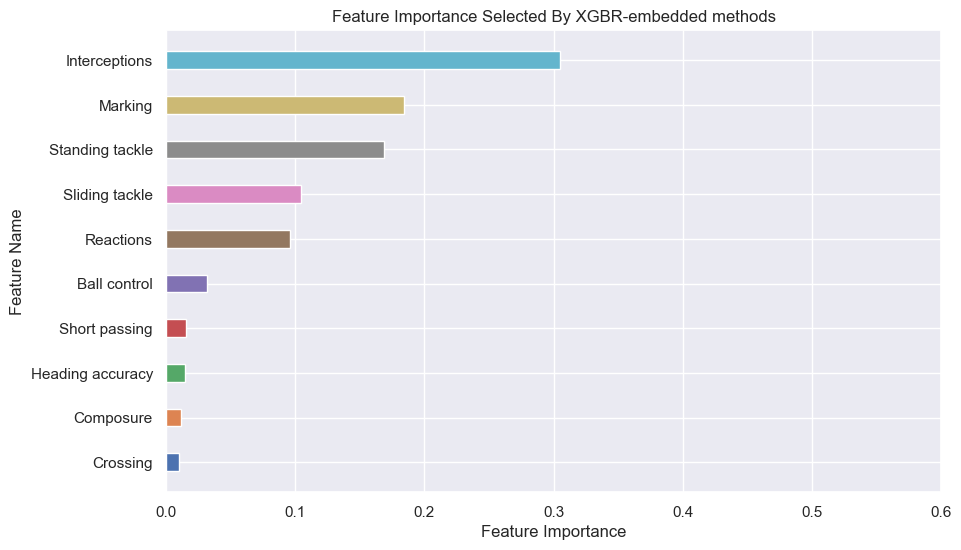

In [157]:
import seaborn as sns
sns.set()
model = reg

import matplotlib.pyplot as plt
import seaborn as sns

name = fx_avg.columns
impxgb = pd.DataFrame({'cols': fx_avg.columns, 'imp': model.feature_importances_}).sort_values('imp', ascending = True)

name = impxgb['cols'][-10:]
imp = impxgb['imp'][-10:]

plt.figure(figsize=[10, 6])

for i, val in enumerate(imp):
    plt.barh(i, val, height=0.4)  # Adjust the height as needed

plt.yticks(range(len(name)), name)  # Set y-axis ticks and labels
plt.xlim(0, 0.6)  # Set x-axis limits
plt.ylabel("Feature Name")
plt.xlabel("Feature Importance")
plt.title("Feature Importance Selected By XGBR-embedded methods")

plt.grid(True)  # Add gridlines

plt.show()




In [158]:
newxgb =  bx_avg.loc[:,list(impxgb['cols'][-10:])].copy()
newxgb['Rating'] = by['rating']

backward factor analysis

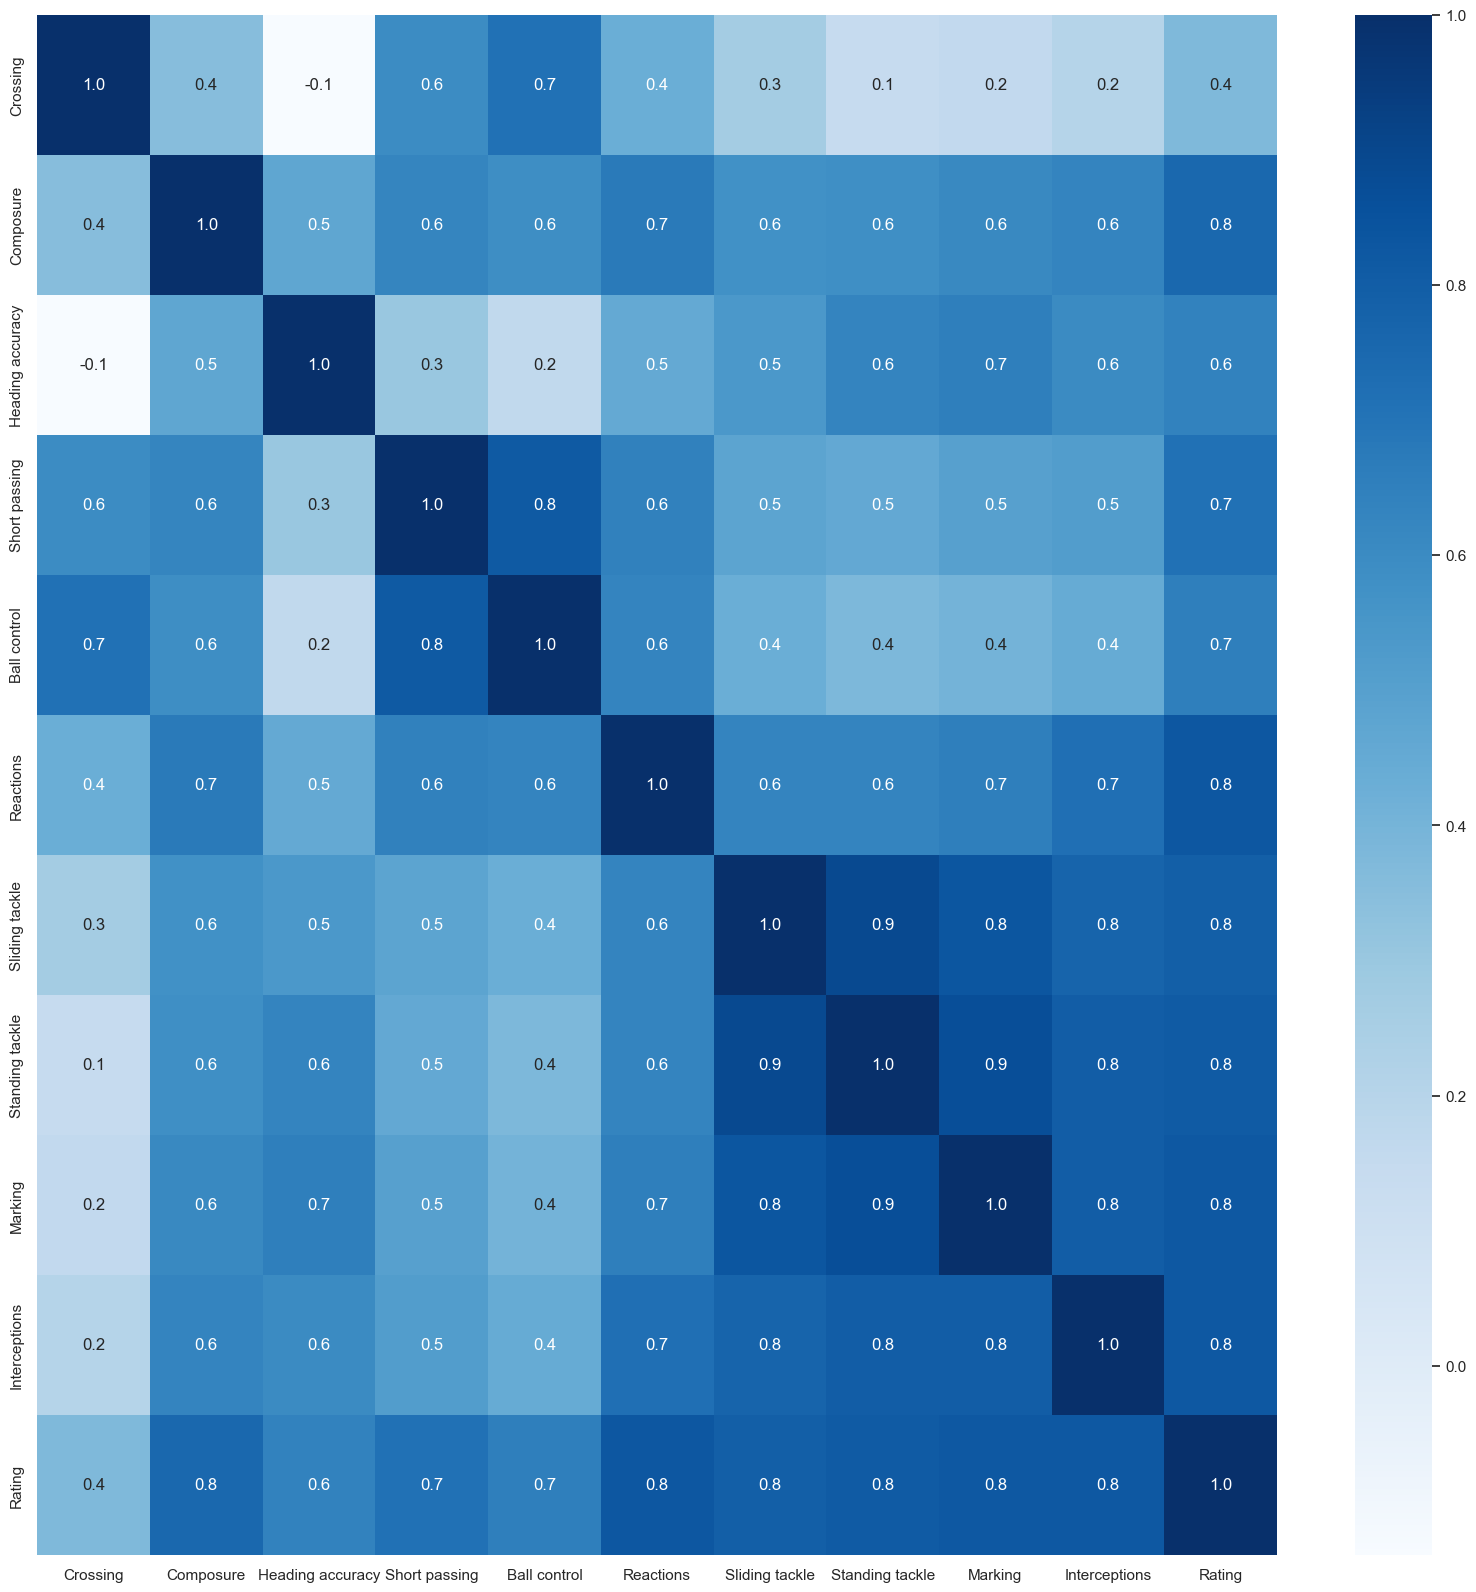

In [159]:
plt.figure(figsize=(20, 20))

# 绘制热力图，并显示数字（保留一位小数）
sns.heatmap(newxgb.corr(), annot=True, fmt='.1f', cmap='Blues')

# 显示图像
plt.show()

In [166]:
fac = newxgb.iloc[:,:-1]
chi_square_value, p_value = calculate_bartlett_sphericity(fac)
chi_square_value, p_value

(58689.94105307181, 0.0)

In [167]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(fac)
kmo_model

0.9053305890880639

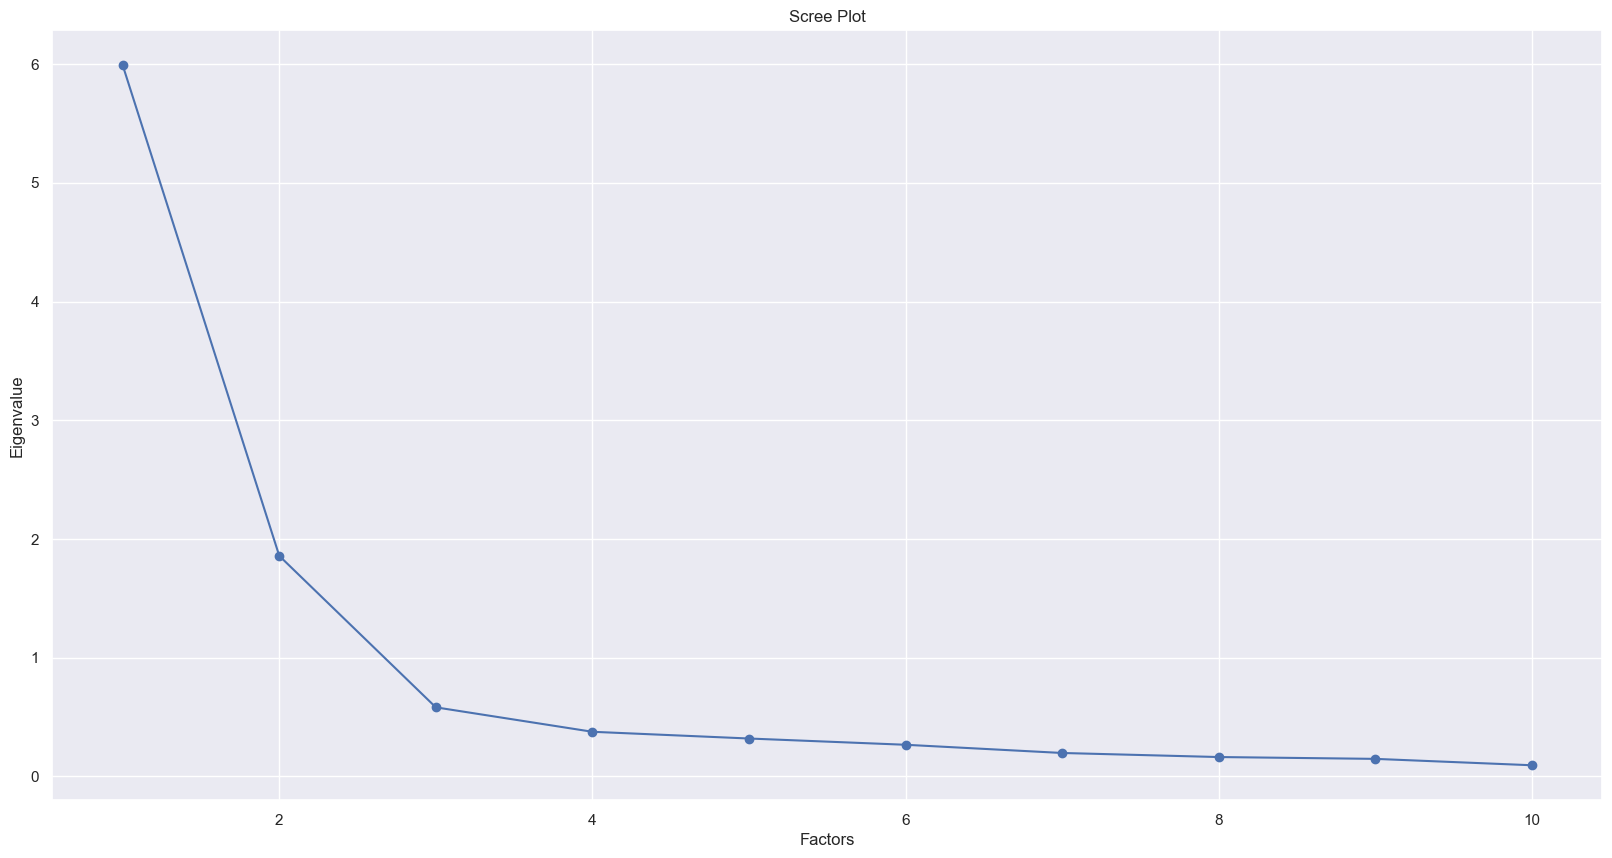

In [168]:
# 同样的数据绘制散点图和折线图
plt.figure(figsize=[20,10])
sns.set()
plt.scatter(range(1, fac.shape[1] + 1), ev)
plt.plot(range(1, fac.shape[1] + 1), ev)
 
# 显示图的标题和xy轴的名字
# 最好使用英文，中文可能乱码
plt.title("Scree Plot")  
plt.xlabel("Factors")
plt.ylabel("Eigenvalue")
plt.grid(True)  # Add gridlines
plt.show()  # 显示图形

In [169]:

faa_two = FactorAnalyzer(2,rotation='varimax')
faa_two.fit(fac)

FactorAnalyzer(n_factors=2, rotation='varimax', rotation_kwargs={})

In [170]:
eigenvalues = faa_two.get_eigenvalues()
variance_explained = np.cumsum(eigenvalues[0]) / np.sum(eigenvalues[0])
print(variance_explained)
print("累计方差解释：",variance_explained[1])

[0.5990622  0.78489758 0.84314083 0.88079732 0.91278461 0.93950452
 0.959308   0.97569217 0.9905337  1.        ]
累计方差解释： 0.7848975782457606


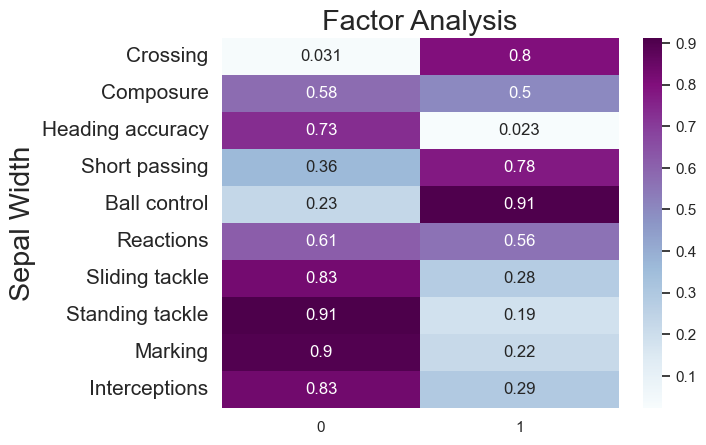

In [171]:
df1 = pd.DataFrame(np.abs(faa_two.loadings_),index=fac.columns)
# 绘图
ax = sns.heatmap(df1, annot=True, cmap="BuPu")
 
# 设置y轴字体大小
ax.yaxis.set_tick_params(labelsize=15)
plt.title("Factor Analysis", fontsize="xx-large")
 
# 设置y轴标签
plt.ylabel("Sepal Width", fontsize="xx-large")
# 显示图片
plt.show()

classification for backward

In [172]:
X = newxgb
model = AgglomerativeClustering(n_clusters=2)
agg_yhat = model.fit_predict(X)


In [173]:
model = Birch(threshold=0.01, n_clusters=2)
model.fit(X)
bir_yhat = model.predict(X)

In [174]:
model = MiniBatchKMeans(n_clusters=2)
model.fit(X)
mini_yhat = model.predict(X)

In [175]:
model = GaussianMixture(n_components=2)
model.fit(X)
gau_yhat = model.predict(X)

In [176]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(n_clusters=2)

In [177]:

newxgb['kme_cluster'] = kmeans.labels_
newxgb['agg'] = agg_yhat
newxgb['bir'] =bir_yhat 
newxgb['mini'] = mini_yhat 
newxgb['gau'] = gau_yhat

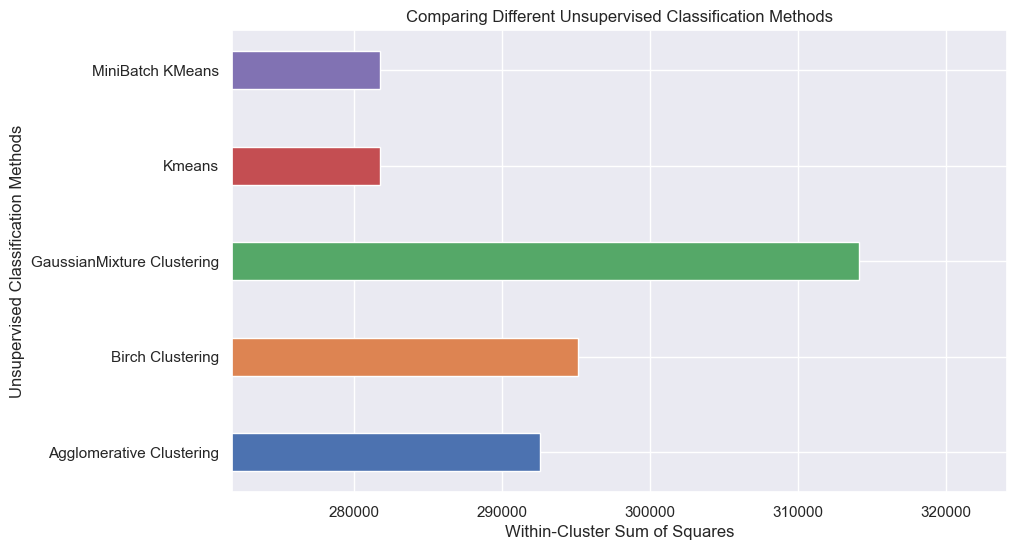

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns

name = ["Agglomerative Clustering", "Birch Clustering", "GaussianMixture Clustering", "Kmeans", "MiniBatch KMeans"]

import matplotlib.pyplot as plt
import seaborn as sns



plt.figure(figsize=[10, 6])

for i, val in enumerate(result):
    plt.barh(i, val, height=0.4)  # Adjust the height as needed

plt.yticks(range(len(name)), name)  # Set y-axis ticks and labels
plt.xlim(min(result)-10000, max(result)+10000)  # Set x-axis limits
plt.xlabel("Within-Cluster Sum of Squares")
plt.ylabel("Unsupervised Classification Methods")
plt.title("Comparing Different Unsupervised Classification Methods")

plt.grid(True)  # Add gridlines

plt.show()





In [83]:
newxgb.groupby(newxgb['mini'])['Rating'].mean()

mini
0    61.401547
1    70.468991
Name: Rating, dtype: float64

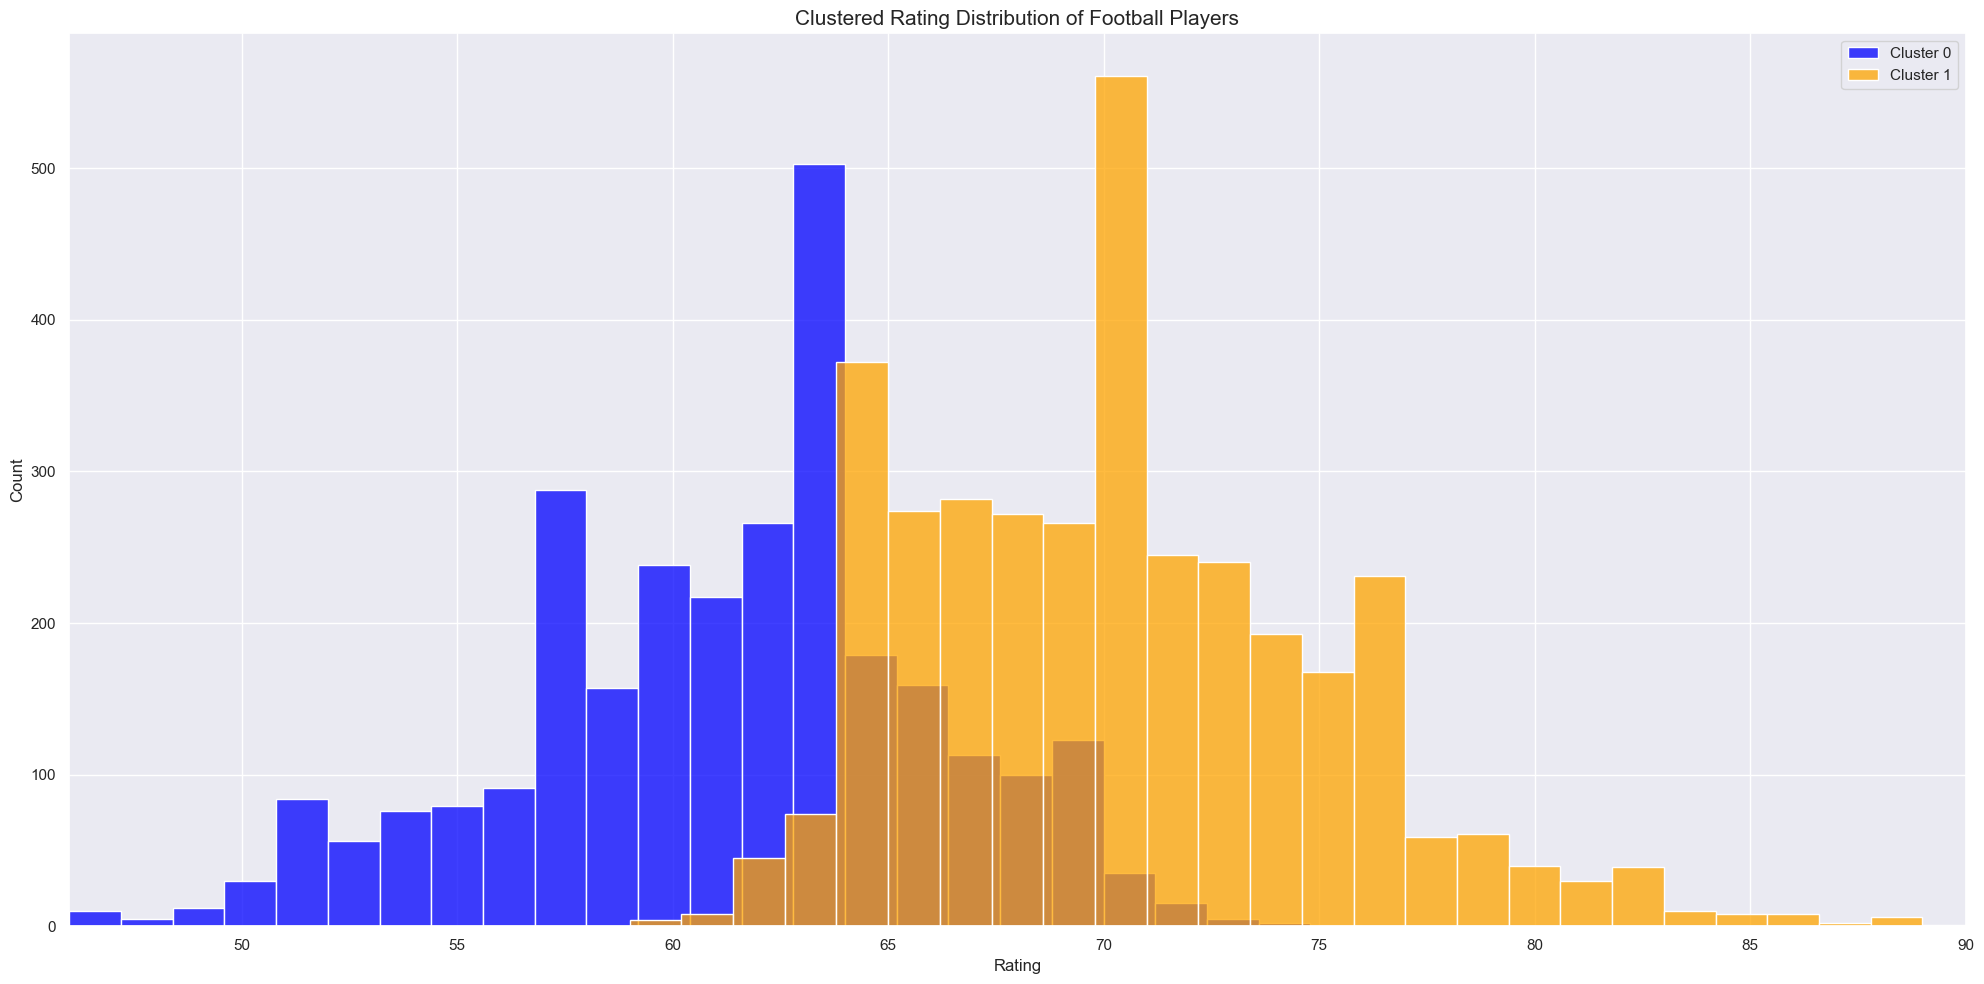

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(figsize=(20, 10))

# Set the bar width
bar_width = 1.2

# Plot the histogram for cluster 0
sns.histplot(newxgb[newxgb['mini'] == 0]['Rating'], ax=ax, color='blue', label='Cluster 0', binwidth=bar_width)

# Plot the histogram for cluster 1
sns.histplot(newxgb[newxgb['mini'] == 1]['Rating'], ax=ax, color='orange', label='Cluster 1', binwidth=bar_width)

# Set the x-axis limits to avoid cutoff bars
ax.set_xlim(newxgb['Rating'].min(), newxgb['Rating'].max())

# Add labels and legend
ax.set_xlabel('Rating')
ax.set_ylabel('Count')
ax.legend()

# Set title and adjust layout
plt.title("Clustered Rating Distribution of Football Players", fontsize=15)
plt.tight_layout()

# Show the plot
plt.show()


feature inportance analysis for backward

In [85]:
X = newxgb[newxgb['mini']==0].iloc[:,:-6]
y = newxgb[newxgb['mini']==0]['Rating']
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.2,random_state=420)


reg = XGBR(n_estimators=200)
reg.fit(Xtrain, Ytrain)
reg_svr = SVR()
reg_svr.fit(Xtrain, Ytrain)
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(Xtrain, Ytrain)
model_ridge = Ridge(alpha=2)
model_ridge.fit(Xtrain, Ytrain)
model_elastic = ElasticNet()
model_elastic.fit(Xtrain,Ytrain)


reg_rf3 = RFR(n_estimators = 200)

reg_rf3.fit(Xtrain, Ytrain)

modelname =["XGBR","RandomForest","SVR","Lasso","Ridge","Elastic"]
model = []
r23 = []
model.append(reg)
model.append(reg_rf3)
model.append(reg_svr)
model.append(model_lasso)
model.append(model_ridge)
model.append(model_elastic)
for i in model:
    rr,mm = reviewmodel(i,Xtest,Ytest,cv)
    r23.append(rr)
import matplotlib.pyplot as plt
import seaborn as sns
name = ["XGBR", "RandomForest", "SVR", "Lasso", "Ridge", "Elastic"]

R-squared score : 0.8834708370899088
Mean squared error: 2.722864856415962
R-squared score : 0.8946830784507052
Mean squared error: 2.410512521968365
R-squared score : 0.9057794430721083
Mean squared error: 2.1052702488995663
R-squared score : 0.7929910250335983
Mean squared error: 4.425755641254655
R-squared score : 0.7929907671257774
Mean squared error: 4.424683662800955
R-squared score : 0.7924013160890248
Mean squared error: 4.501914803041377


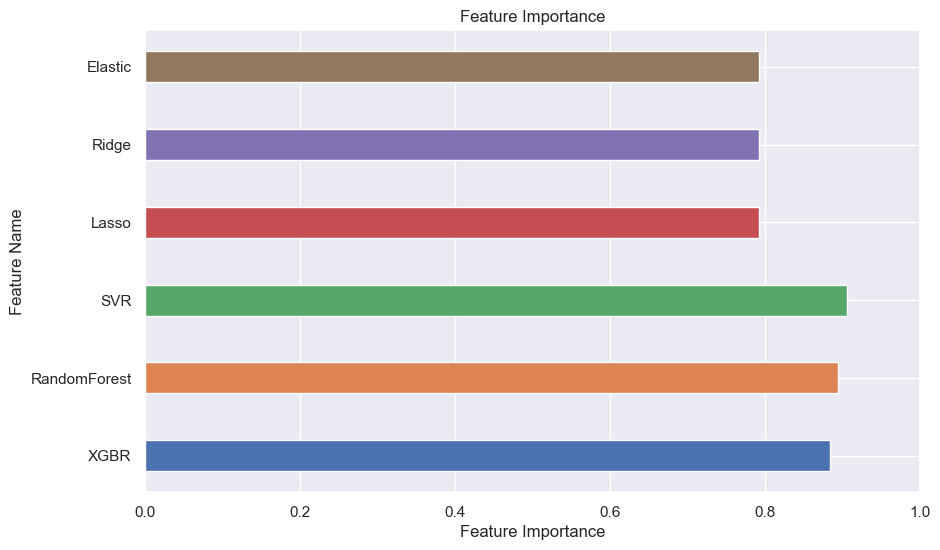

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

name = ["XGBR", "RandomForest", "SVR", "Lasso", "Ridge", "Elastic"]

plt.figure(figsize=[10, 6])

for i, val in enumerate(r23):
    plt.barh(i, val, height=0.4) # Adjust the height as needed

plt.yticks(range(len(name)), name) # Set y-axis ticks and labels
plt.xlim(0, 1) # Set x-axis limits
plt.ylabel("Feature Name")
plt.xlabel("Feature Importance")
plt.title("Feature Importance")

plt.grid(True) # Add gridlines

plt.show()

In [87]:
from sklearn.inspection import permutation_importance
result = permutation_importance(reg_svr, X, y, n_repeats=10, random_state=42)

# Get feature importances
importances = result.importances_mean

# Print feature importances
print(importances)

[0.09154417 0.13933972 0.08216276 0.04839706 0.03738444 0.0622319
 0.0549232  0.15730041 0.01081142 0.06402211]


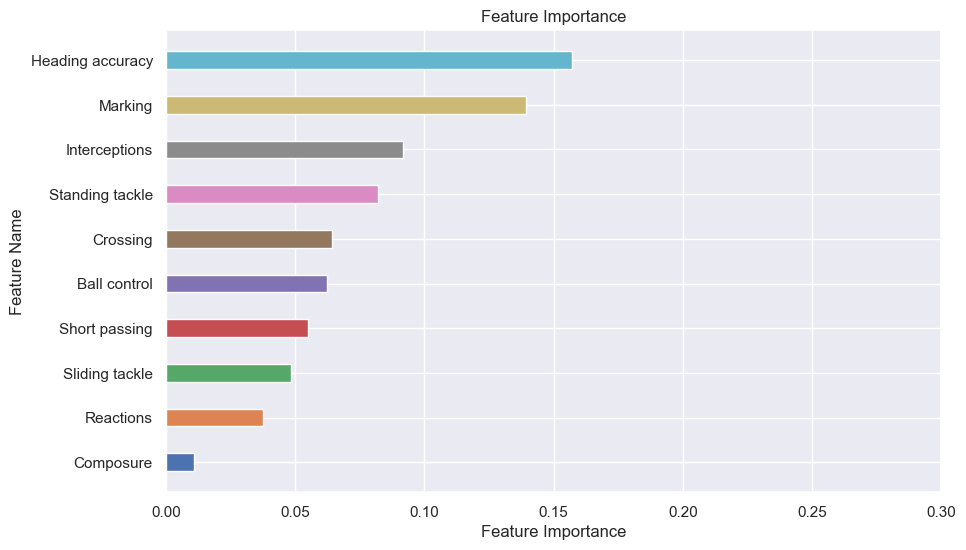

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

name = X.columns
impxgb = pd.DataFrame({'cols': X.columns, 'imp': importances}).sort_values('imp', ascending = True)

name = impxgb['cols']
imp = impxgb['imp']

plt.figure(figsize=[10, 6])

for i, val in enumerate(imp):
    plt.barh(i, val, height=0.4)  # Adjust the height as needed

plt.yticks(range(len(name)), name)  # Set y-axis ticks and labels
plt.xlim(0, 0.3)  # Set x-axis limits
plt.ylabel("Feature Name")
plt.xlabel("Feature Importance")
plt.title("Feature Importance")

plt.grid(True)  # Add gridlines

plt.show()




In [89]:
X = newxgb[newxgb['mini']==1].iloc[:,:-6]
y = newxgb[newxgb['mini']==1]['Rating']
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.2,random_state=420)


reg = XGBR(n_estimators=200)
reg.fit(Xtrain, Ytrain)
reg_svr = SVR()
reg_svr.fit(Xtrain, Ytrain)
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(Xtrain, Ytrain)
model_ridge = Ridge(alpha=2)
model_ridge.fit(Xtrain, Ytrain)
model_elastic = ElasticNet()
model_elastic.fit(Xtrain,Ytrain)


reg_rf3 = RFR(n_estimators = 200)

reg_rf3.fit(Xtrain, Ytrain)

modelname =["XGBR","RandomForest","SVR","Lasso","Ridge","Elastic"]
model = []
r23 = []
model.append(reg)
model.append(reg_rf3)
model.append(reg_svr)
model.append(model_lasso)
model.append(model_ridge)
model.append(model_elastic)
for i in model:
    rr,mm = reviewmodel(i,Xtest,Ytest,cv)
    r23.append(rr)
import matplotlib.pyplot as plt
import seaborn as sns
name = ["XGBR", "RandomForest", "SVR", "Lasso", "Ridge", "Elastic"]

R-squared score : 0.9030845173575035
Mean squared error: 1.9747084387732112
R-squared score : 0.9116093650132667
Mean squared error: 1.9793848571428572
R-squared score : 0.9080813912591312
Mean squared error: 2.0677162380034084
R-squared score : 0.8605335857913529
Mean squared error: 3.155596590486974
R-squared score : 0.8605345500779636
Mean squared error: 3.1555794896427183
R-squared score : 0.8599605818576969
Mean squared error: 3.1747751706848346


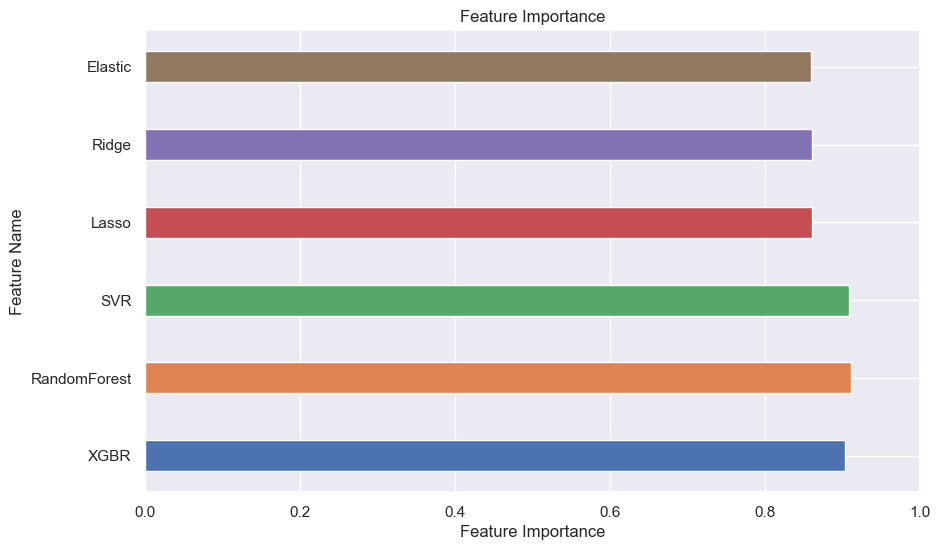

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

name = ["XGBR", "RandomForest", "SVR", "Lasso", "Ridge", "Elastic"]

plt.figure(figsize=[10, 6])

for i, val in enumerate(r23):
    plt.barh(i, val, height=0.4) # Adjust the height as needed

plt.yticks(range(len(name)), name) # Set y-axis ticks and labels
plt.xlim(0, 1) # Set x-axis limits
plt.ylabel("Feature Name")
plt.xlabel("Feature Importance")
plt.title("Feature Importance")

plt.grid(True) # Add gridlines

plt.show()

In [91]:
explainer = shap.Explainer(reg_rf3)
shap_values = explainer(X)

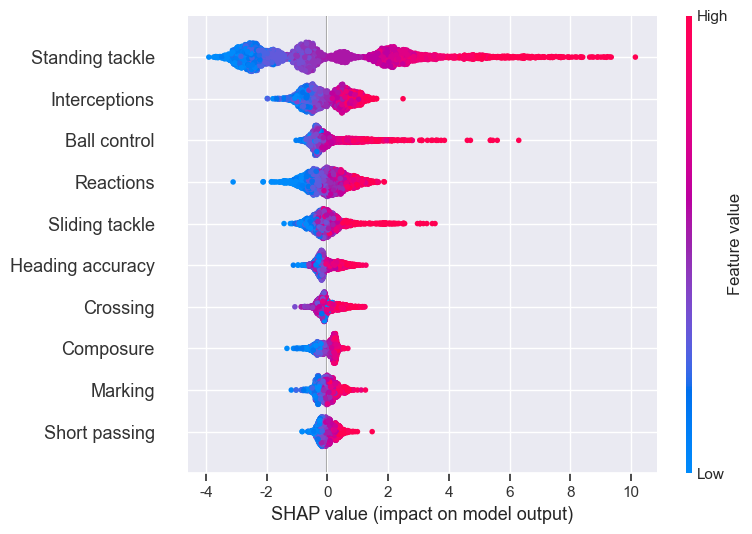

In [92]:
shap.summary_plot(shap_values, X)

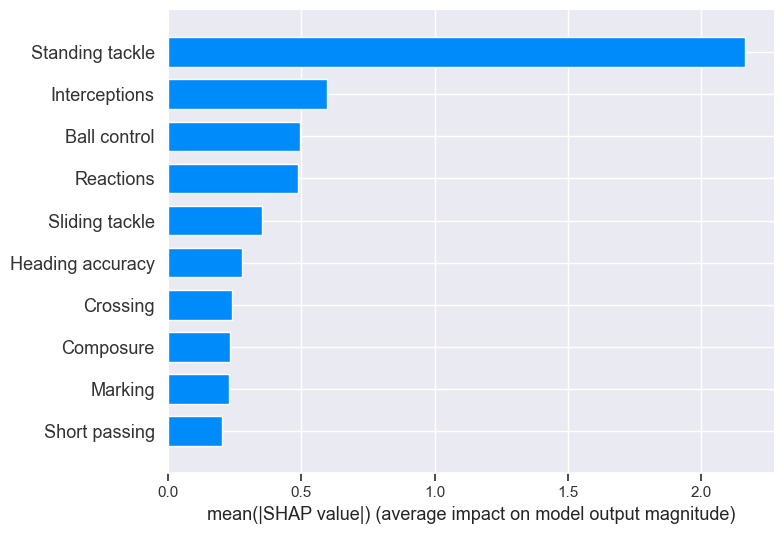

In [93]:
shap.summary_plot(shap_values, X, plot_type="bar")

In [94]:
shap_values_mean = shap_values.abs.mean(axis=0)
shap_values_mean

.values =
array([0.59706221, 0.22840357, 2.16481758, 0.3509609 , 0.48586933,
       0.49550725, 0.20193152, 0.27737119, 0.23400291, 0.23880245])

.base_values =
array([70.42850661])

.data =
array([68.0740366 , 68.09077495, 70.21336557, 69.08802515, 66.70446479,
       64.40103659, 65.50331791, 63.58496299, 64.68668424, 60.48329521])

goalkeeper feature selection

In [9]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(gx_avg,gy,test_size=0.2,random_state=420)
reg = XGBR(n_estimators=200).fit(Xtrain,Ytrain) #训练
reg.predict(Xtest) #传统接口predict
print("R^2",reg.score(Xtest,Ytest))#R^2评估指标
print("MSE",MSE(Ytest,reg.predict(Xtest)))
print("importance",reg.feature_importances_)

R^2 0.9849781363401318
MSE 280474.3275574692
importance [1.3757356e-04 8.8000682e-04 2.3233927e-04 2.6652534e-04 1.1907195e-04
 1.5313971e-04 2.2335361e-04 1.2988192e-03 2.0428658e-04 1.8975840e-04
 1.5837517e-04 5.2975345e-01 5.1160380e-02 3.5322560e-03 2.0671812e-01
 1.6742139e-01 1.0525395e-04 2.3979874e-04 2.7546688e-04 2.2556880e-04
 2.7226680e-04 1.5479091e-04 8.2987361e-04 2.0022606e-04 3.2184623e-02
 6.2920415e-04 2.1694311e-04 2.5837644e-04 1.7086002e-04 1.9712301e-04
 3.9814768e-04 2.9300136e-04 7.1417674e-04 1.8556222e-04]


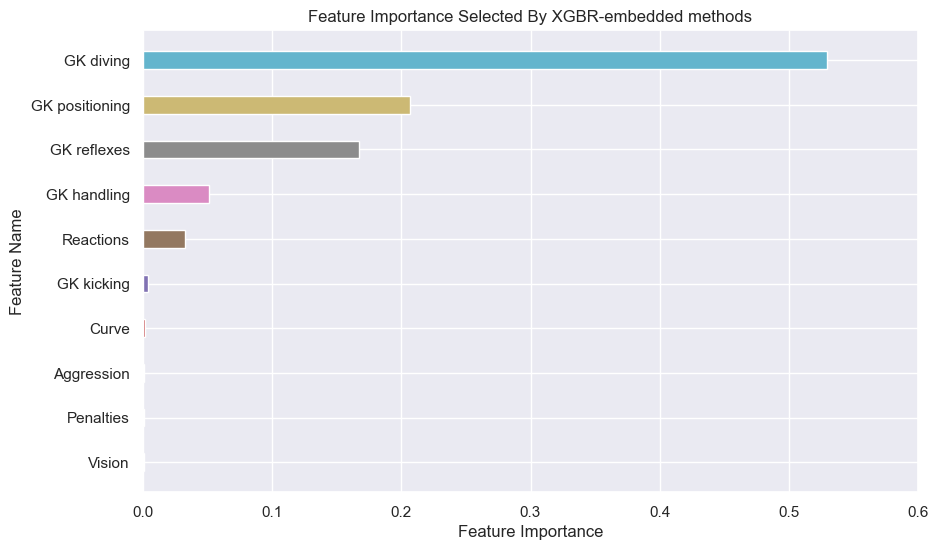

In [11]:
import seaborn as sns
sns.set()
model = reg

import matplotlib.pyplot as plt
import seaborn as sns

name = fx_avg.columns
impxgb = pd.DataFrame({'cols': gx_avg.columns, 'imp': model.feature_importances_}).sort_values('imp', ascending = True)

name = impxgb['cols'][-10:]
imp = impxgb['imp'][-10:]

plt.figure(figsize=[10, 6])

for i, val in enumerate(imp):
    plt.barh(i, val, height=0.4)  # Adjust the height as needed

plt.yticks(range(len(name)), name)  # Set y-axis ticks and labels
plt.xlim(0, 0.6)  # Set x-axis limits
plt.ylabel("Feature Name")
plt.xlabel("Feature Importance")
plt.title("Feature Importance Selected By XGBR-embedded methods")

plt.grid(True)  # Add gridlines

plt.show()




In [12]:
newxgb =  gx_avg.loc[:,list(impxgb['cols'][-10:])].copy()
newxgb['Rating'] = fy['rating']

goalkeeper factor analysis

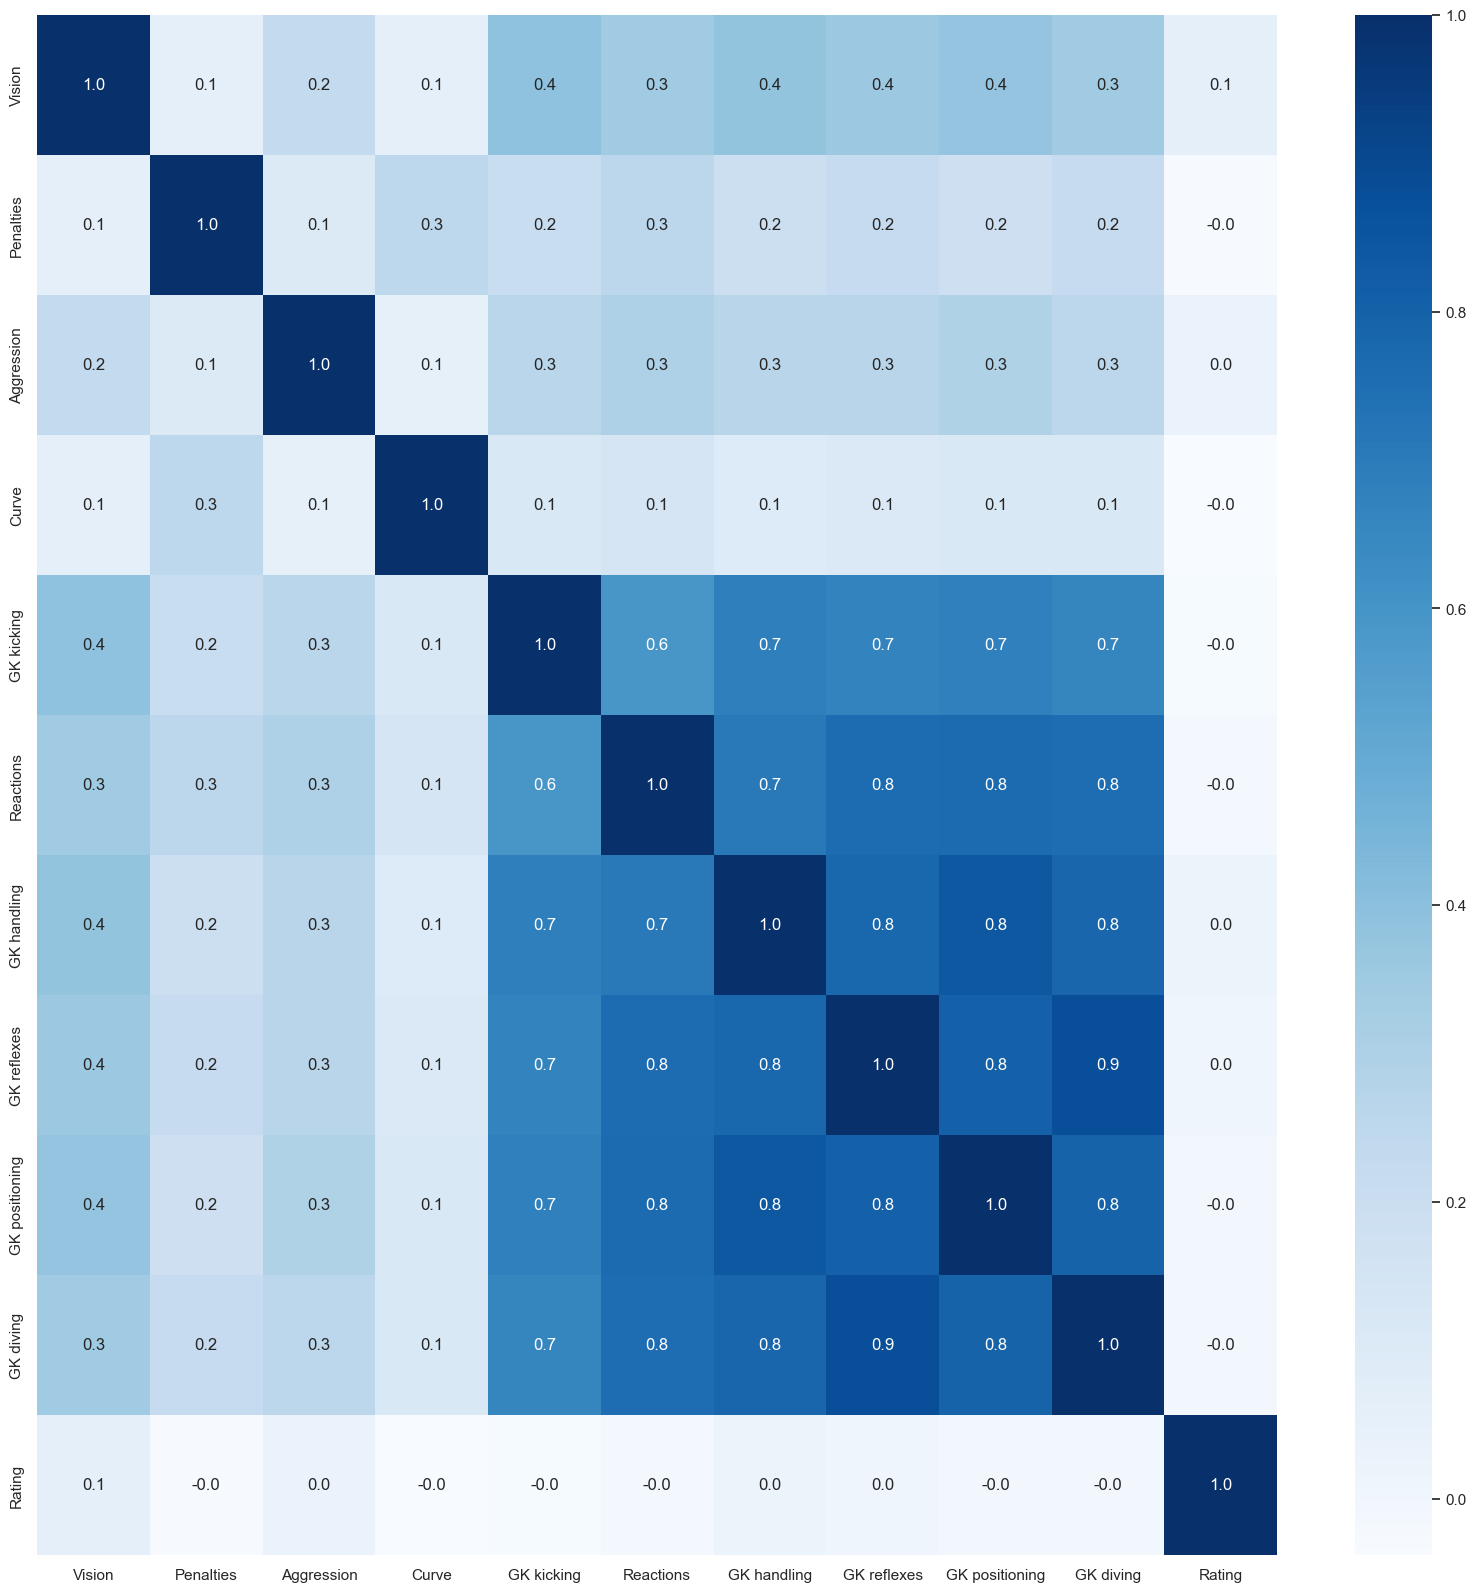

In [13]:
plt.figure(figsize=(20, 20))

# 绘制热力图，并显示数字（保留一位小数）
sns.heatmap(newxgb.corr(), annot=True, fmt='.1f', cmap='Blues')

# 显示图像
plt.show()

In [16]:
fac = newxgb.iloc[:,:-1]
chi_square_value, p_value = calculate_bartlett_sphericity(fac)
chi_square_value, p_value

(12754.734645227878, 0.0)

In [17]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(fac)
kmo_model

0.9165673421080307

In [18]:
faa = FactorAnalyzer(25,rotation=None)
faa.fit(fac)
 
# 得到特征值ev、特征向量v
ev,v=faa.get_eigenvalues()
ev,v

(array([5.15238842, 1.17792543, 0.92811992, 0.78927618, 0.70818821,
        0.4237158 , 0.27705962, 0.27242896, 0.15336001, 0.11753744]),
 array([ 4.94137121e+00,  5.10870038e-01,  2.98452211e-01,  1.53829778e-01,
         1.28142776e-01,  7.38800781e-02,  3.06356971e-02,  2.26967893e-02,
         9.03356626e-03, -1.95993817e-05]))

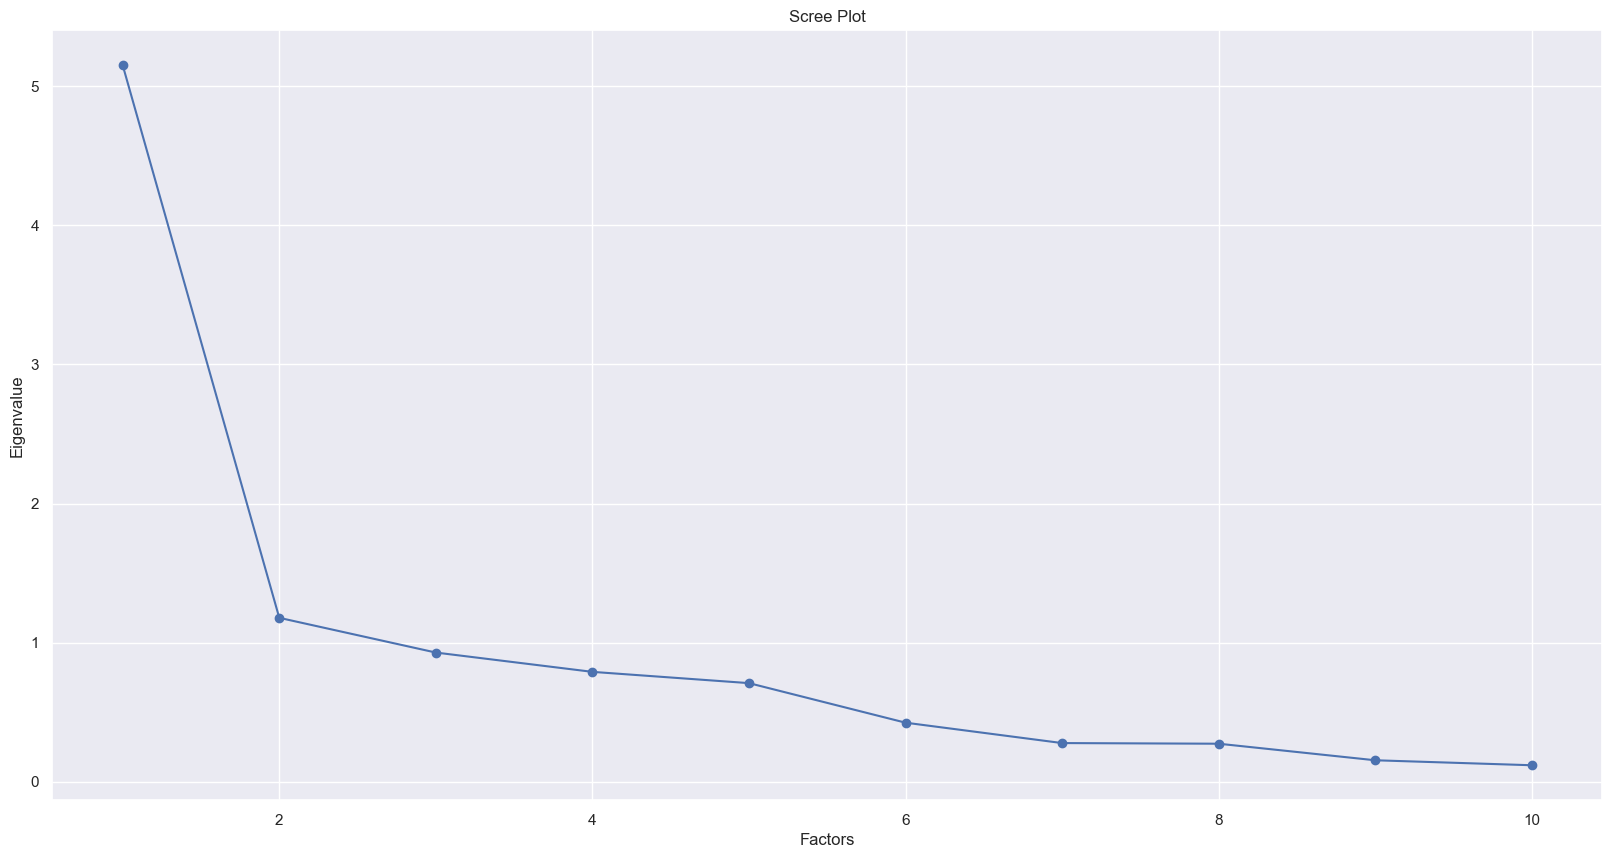

In [19]:
# 同样的数据绘制散点图和折线图
plt.figure(figsize=[20,10])
sns.set()
plt.scatter(range(1, fac.shape[1] + 1), ev)
plt.plot(range(1, fac.shape[1] + 1), ev)
 
# 显示图的标题和xy轴的名字
# 最好使用英文，中文可能乱码
plt.title("Scree Plot")  
plt.xlabel("Factors")
plt.ylabel("Eigenvalue")
plt.grid(True)  # Add gridlines
plt.show()  # 显示图形

In [20]:
# 选择方式： varimax 方差最大化
# 选择固定因子为 2 个
faa_two = FactorAnalyzer(2,rotation='varimax')
faa_two.fit(fac)

FactorAnalyzer(n_factors=2, rotation='varimax', rotation_kwargs={})

In [23]:
eigenvalues = faa_two.get_eigenvalues()
variance_explained = np.cumsum(eigenvalues[0]) / np.sum(eigenvalues[0])
print(variance_explained)
print("累计方差解释：",variance_explained[1])

[0.51523884 0.63303139 0.72584338 0.804771   0.87558982 0.9179614
 0.94566736 0.97291025 0.98824626 1.        ]
累计方差解释： 0.6330313856472622


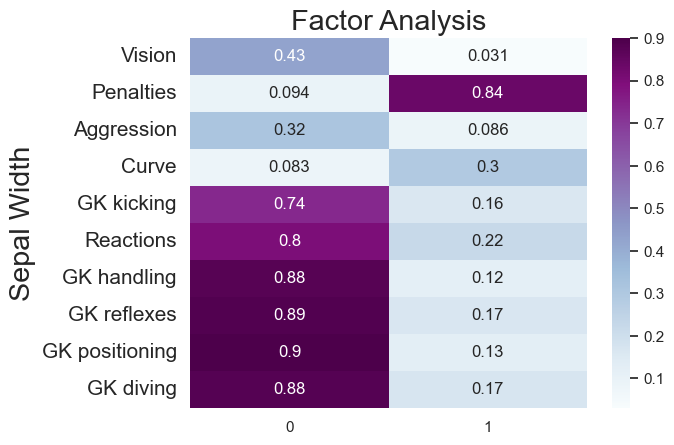

In [24]:
df1 = pd.DataFrame(np.abs(faa_two.loadings_),index=fac.columns)
# 绘图
ax = sns.heatmap(df1, annot=True, cmap="BuPu")
 
# 设置y轴字体大小
ax.yaxis.set_tick_params(labelsize=15)
plt.title("Factor Analysis", fontsize="xx-large")
 
# 设置y轴标签
plt.ylabel("Sepal Width", fontsize="xx-large")
# 显示图片
plt.show()

classification for goalkeeper

In [27]:
X = newxgb
model = AgglomerativeClustering(n_clusters=3)
agg_yhat = model.fit_predict(X)
model = Birch(threshold=0.01, n_clusters=3)
model.fit(X)
bir_yhat = model.predict(X)
model = MiniBatchKMeans(n_clusters=3)
model.fit(X)
mini_yhat = model.predict(X)
model = GaussianMixture(n_components=3)
model.fit(X)
gau_yhat = model.predict(X)
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# Add the cluster labels to the data
newxgb['kme_cluster'] = kmeans.labels_
newxgb['agg'] = agg_yhat
newxgb['bir'] =bir_yhat 
newxgb['mini'] = mini_yhat 
newxgb['gau'] = gau_yhat

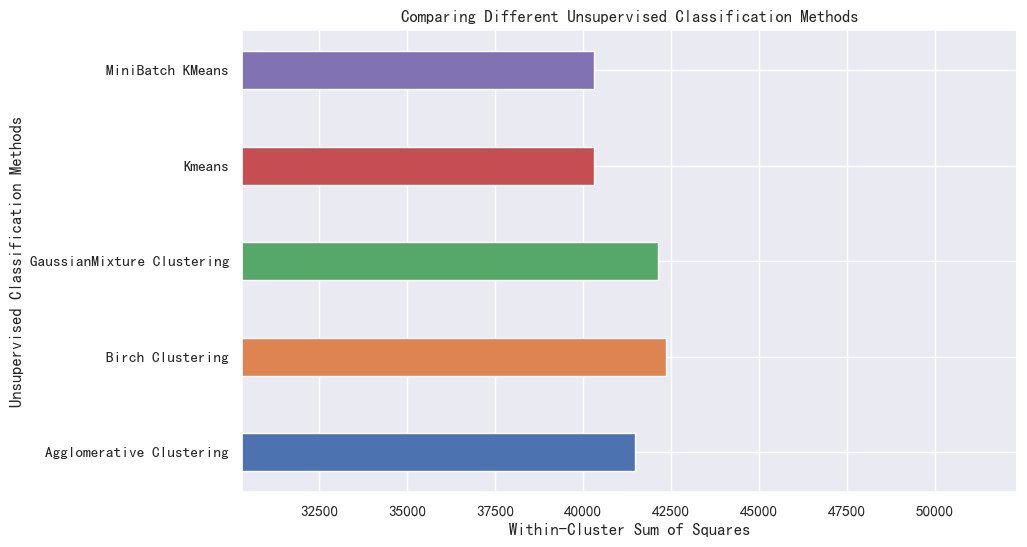

In [34]:
name = ["agg","bir","gau","kme_cluster","mini"]
result = []
for i in name:
    result.append(calculate_cluster_distances(newxgb,i))

name = ["Agglomerative Clustering", "Birch Clustering", "GaussianMixture Clustering", "Kmeans", "MiniBatch KMeans"]


plt.figure(figsize=[10, 6])

for i, val in enumerate(result):
    plt.barh(i, val, height=0.4)  # Adjust the height as needed

plt.yticks(range(len(name)), name)  # Set y-axis ticks and labels
plt.xlim(min(result)-10000, max(result)+10000)  # Set x-axis limits
plt.xlabel("Within-Cluster Sum of Squares")
plt.ylabel("Unsupervised Classification Methods")
plt.title("Comparing Different Unsupervised Classification Methods")

plt.grid(True)  # Add gridlines

plt.show()





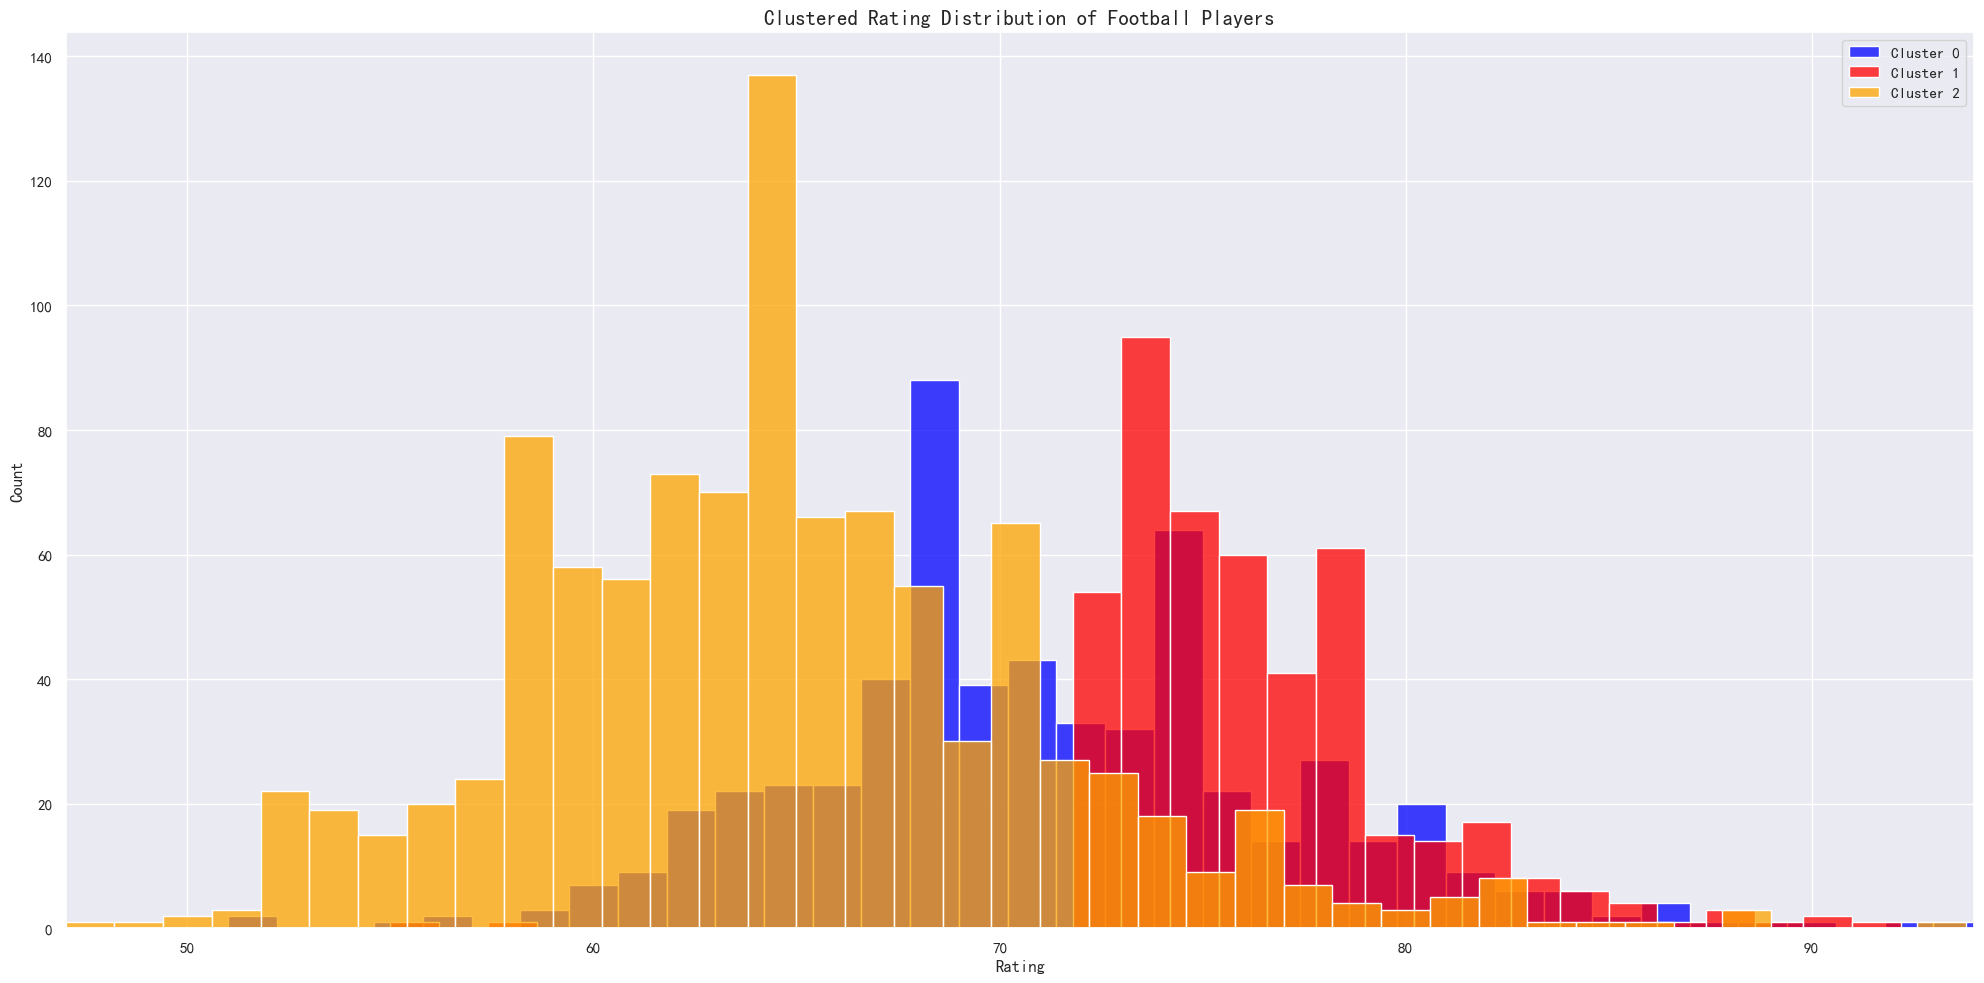

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(figsize=(20, 10))

# Set the bar width
bar_width = 1.2

# Plot the histogram for cluster 0
sns.histplot(newxgb[newxgb['kme_cluster'] == 0]['Rating'], ax=ax, color='blue', label='Cluster 0', binwidth=bar_width)

# Plot the histogram for cluster 1
sns.histplot(newxgb[newxgb['kme_cluster'] == 1]['Rating'], ax=ax, color='red', label='Cluster 1', binwidth=bar_width)
sns.histplot(newxgb[newxgb['kme_cluster'] == 2]['Rating'], ax=ax, color='orange', label='Cluster 2', binwidth=bar_width)

# Set the x-axis limits to avoid cutoff bars
ax.set_xlim(newxgb['Rating'].min(), newxgb['Rating'].max())

# Add labels and legend
ax.set_xlabel('Rating')
ax.set_ylabel('Count')
ax.legend()

# Set title and adjust layout
plt.title("Clustered Rating Distribution of Football Players", fontsize=15)
plt.tight_layout()

# Show the plot
plt.show()


feature inportance analysis for goalkeeper

In [36]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error as MSE #MSE代表均方误差
from sklearn.linear_model import Ridge, LinearRegression, Lasso#岭回归lasso回归
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR

X = newxgb[newxgb['kme_cluster']==0].iloc[:,:-6]
y = newxgb[newxgb['kme_cluster']==0]['Rating']
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.2,random_state=420)


reg = XGBR(n_estimators=200)
reg.fit(Xtrain, Ytrain)
reg_svr = SVR()
reg_svr.fit(Xtrain, Ytrain)
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(Xtrain, Ytrain)
model_ridge = Ridge(alpha=2)
model_ridge.fit(Xtrain, Ytrain)
model_elastic = ElasticNet()
model_elastic.fit(Xtrain,Ytrain)


reg_rf3 = RFR(n_estimators = 200)

reg_rf3.fit(Xtrain, Ytrain)

modelname =["XGBR","RandomForest","SVR","Lasso","Ridge","Elastic"]
model = []
r23 = []
model.append(reg)
model.append(reg_rf3)
model.append(reg_svr)
model.append(model_lasso)
model.append(model_ridge)
model.append(model_elastic)
for i in model:
    rr,mm = reviewmodel(i,Xtest,Ytest,cv)
    r23.append(rr)
import matplotlib.pyplot as plt
import seaborn as sns
name = ["XGBR", "RandomForest", "SVR", "Lasso", "Ridge", "Elastic"]


R-squared score : 0.7277249808121741
Mean squared error: 7.3409360317805135
R-squared score : 0.7642377646823583
Mean squared error: 5.216940809269993
R-squared score : 0.6860533413257601
Mean squared error: 6.776046132001079
R-squared score : 0.6659517257100092
Mean squared error: 7.702920587174105
R-squared score : 0.6659406252373948
Mean squared error: 7.702825654642981
R-squared score : 0.6662458323296364
Mean squared error: 7.746131880189939


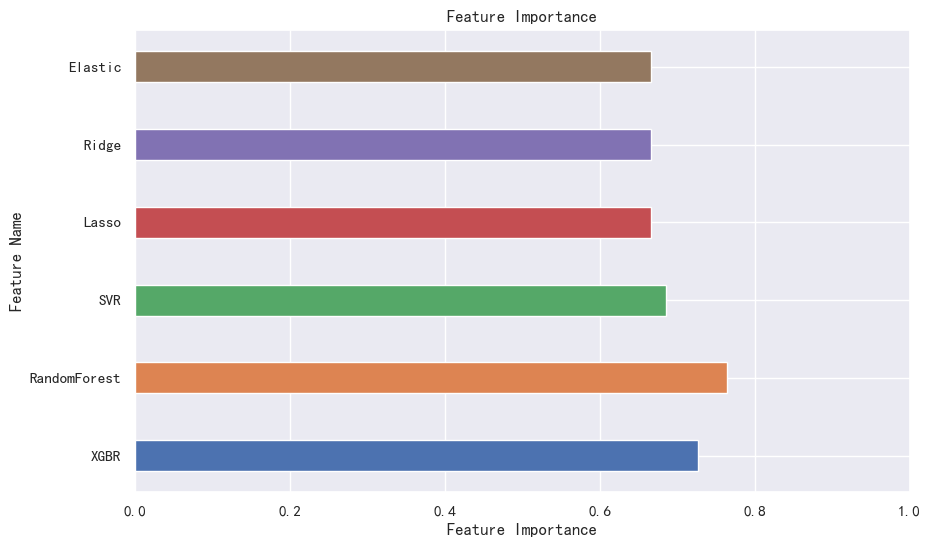

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

name = ["XGBR", "RandomForest", "SVR", "Lasso", "Ridge", "Elastic"]

plt.figure(figsize=[10, 6])

for i, val in enumerate(r23):
    plt.barh(i, val, height=0.4) # Adjust the height as needed

plt.yticks(range(len(name)), name) # Set y-axis ticks and labels
plt.xlim(0, 1) # Set x-axis limits
plt.ylabel("Feature Name")
plt.xlabel("Feature Importance")
plt.title("Feature Importance")

plt.grid(True) # Add gridlines

plt.show()

In [39]:
explainer = shap.Explainer(reg_rf3)
shap_values = explainer(X)

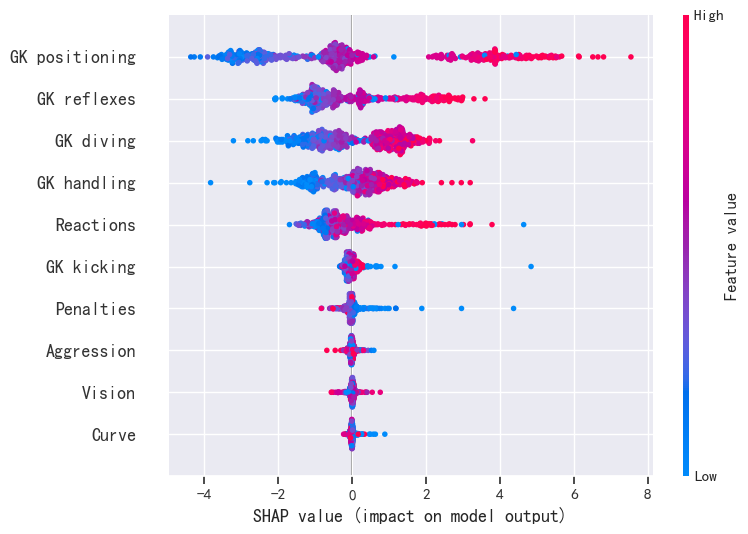

In [40]:
shap.summary_plot(shap_values, X)

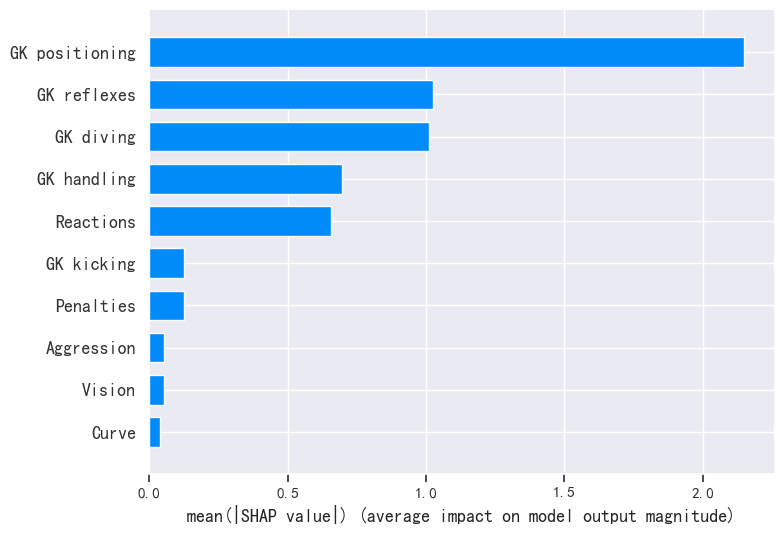

In [41]:
shap.summary_plot(shap_values, X, plot_type="bar")

In [42]:
shap_values_mean = shap_values.abs.mean(axis=0)
shap_values_mean

.values =
array([0.05158745, 0.12511002, 0.05169333, 0.0404066 , 0.12614935,
       0.65809134, 0.69718914, 1.02563316, 2.15075709, 1.01161725])

.base_values =
array([71.28893089])

.data =
array([48.34903532, 22.17686774, 30.75474957, 15.52331606, 68.87857637,
       69.41628961, 70.88181816, 74.82524509, 71.90689017, 73.267362  ])

In [43]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error as MSE #MSE代表均方误差
from sklearn.linear_model import Ridge, LinearRegression, Lasso#岭回归lasso回归
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR

X = newxgb[newxgb['kme_cluster']==1].iloc[:,:-6]
y = newxgb[newxgb['kme_cluster']==1]['Rating']
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.2,random_state=420)


reg = XGBR(n_estimators=200)
reg.fit(Xtrain, Ytrain)
reg_svr = SVR()
reg_svr.fit(Xtrain, Ytrain)
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(Xtrain, Ytrain)
model_ridge = Ridge(alpha=2)
model_ridge.fit(Xtrain, Ytrain)
model_elastic = ElasticNet()
model_elastic.fit(Xtrain,Ytrain)


reg_rf3 = RFR(n_estimators = 200)

reg_rf3.fit(Xtrain, Ytrain)

modelname =["XGBR","RandomForest","SVR","Lasso","Ridge","Elastic"]
model = []
r23 = []
model.append(reg)
model.append(reg_rf3)
model.append(reg_svr)
model.append(model_lasso)
model.append(model_ridge)
model.append(model_elastic)
for i in model:
    rr,mm = reviewmodel(i,Xtest,Ytest,cv)
    r23.append(rr)
import matplotlib.pyplot as plt
import seaborn as sns
name = ["XGBR", "RandomForest", "SVR", "Lasso", "Ridge", "Elastic"]


R-squared score : 0.229343822032481
Mean squared error: 2.559897080612635
R-squared score : 0.46079820628041956
Mean squared error: 2.0000450549450552
R-squared score : 0.5151986438621995
Mean squared error: 2.149960148896116
R-squared score : 0.5440166223691701
Mean squared error: 2.4342266600936324
R-squared score : 0.5439579342949286
Mean squared error: 2.4392254318395037
R-squared score : 0.5414170327023381
Mean squared error: 2.2361356602376348


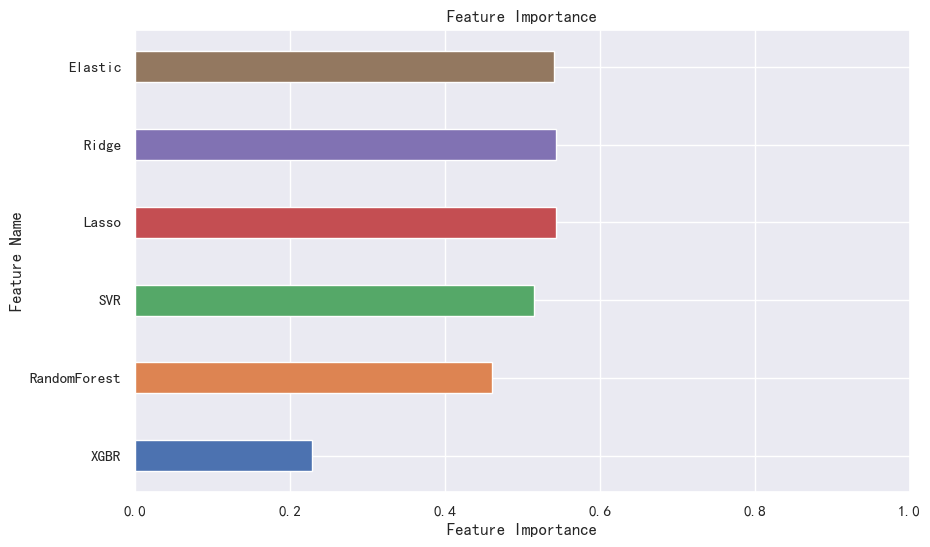

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

name = ["XGBR", "RandomForest", "SVR", "Lasso", "Ridge", "Elastic"]

plt.figure(figsize=[10, 6])

for i, val in enumerate(r23):
    plt.barh(i, val, height=0.4) # Adjust the height as needed

plt.yticks(range(len(name)), name) # Set y-axis ticks and labels
plt.xlim(0, 1) # Set x-axis limits
plt.ylabel("Feature Name")
plt.xlabel("Feature Importance")
plt.title("Feature Importance")

plt.grid(True) # Add gridlines

plt.show()

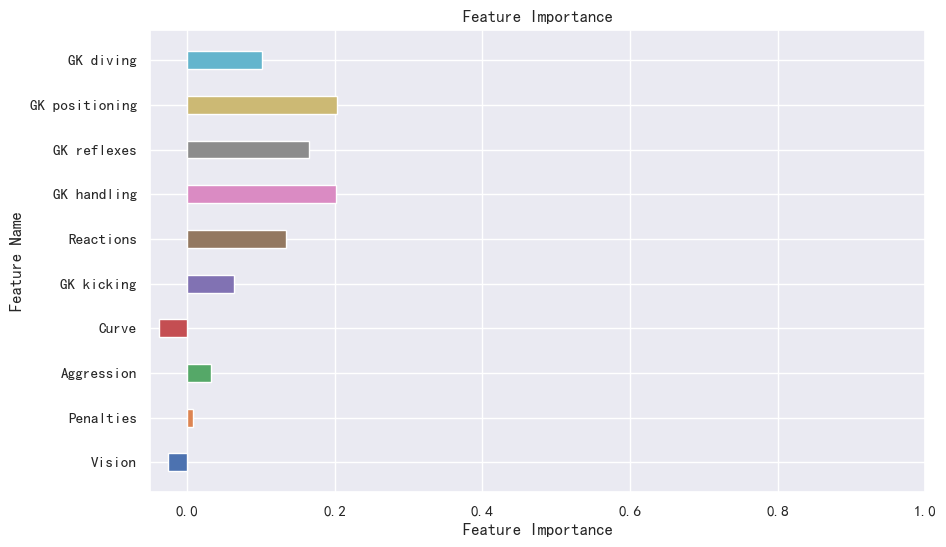

In [45]:

import matplotlib.pyplot as plt
import seaborn as sns

name = X.columns

plt.figure(figsize=[10, 6])

for i, val in enumerate(model_elastic.coef_):
    plt.barh(i, val, height=0.4) # Adjust the height as needed

plt.yticks(range(len(name)), name) # Set y-axis ticks and labels
plt.xlim(-0.05, 1) # Set x-axis limits
plt.ylabel("Feature Name")
plt.xlabel("Feature Importance")
plt.title("Feature Importance")

plt.grid(True) # Add gridlines

plt.show()

In [46]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error as MSE #MSE代表均方误差
from sklearn.linear_model import Ridge, LinearRegression, Lasso#岭回归lasso回归
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR

X = newxgb[newxgb['kme_cluster']==2].iloc[:,:-6]
y = newxgb[newxgb['kme_cluster']==2]['Rating']
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.2,random_state=420)


reg = XGBR(n_estimators=200)
reg.fit(Xtrain, Ytrain)
reg_svr = SVR()
reg_svr.fit(Xtrain, Ytrain)
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(Xtrain, Ytrain)
model_ridge = Ridge(alpha=2)
model_ridge.fit(Xtrain, Ytrain)
model_elastic = ElasticNet()
model_elastic.fit(Xtrain,Ytrain)


reg_rf3 = RFR(n_estimators = 200)

reg_rf3.fit(Xtrain, Ytrain)

modelname =["XGBR","RandomForest","SVR","Lasso","Ridge","Elastic"]
model = []
r23 = []
model.append(reg)
model.append(reg_rf3)
model.append(reg_svr)
model.append(model_lasso)
model.append(model_ridge)
model.append(model_elastic)
for i in model:
    rr,mm = reviewmodel(i,Xtest,Ytest,cv)
    r23.append(rr)
import matplotlib.pyplot as plt
import seaborn as sns
name = ["XGBR", "RandomForest", "SVR", "Lasso", "Ridge", "Elastic"]


R-squared score : 0.11931680732016951
Mean squared error: 33.08759988661267
R-squared score : 0.30498662399105675
Mean squared error: 25.036142045714683
R-squared score : 0.045052219625212886
Mean squared error: 37.05464282185911
R-squared score : 0.05227017311571049
Mean squared error: 36.35245055190607
R-squared score : 0.05212942154848714
Mean squared error: 36.367054219354216
R-squared score : 0.05868429526510963
Mean squared error: 35.75955678759904


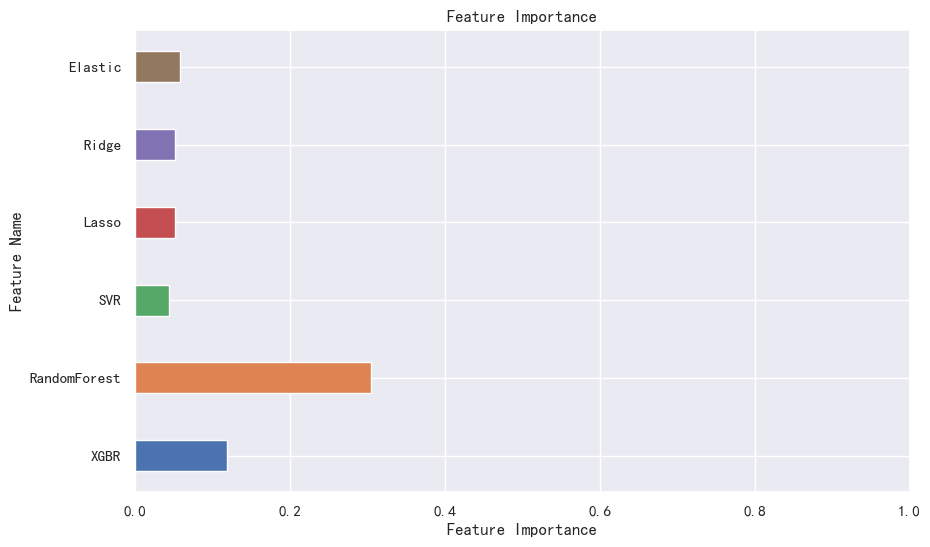

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

name = ["XGBR", "RandomForest", "SVR", "Lasso", "Ridge", "Elastic"]

plt.figure(figsize=[10, 6])

for i, val in enumerate(r23):
    plt.barh(i, val, height=0.4) # Adjust the height as needed

plt.yticks(range(len(name)), name) # Set y-axis ticks and labels
plt.xlim(0, 1) # Set x-axis limits
plt.ylabel("Feature Name")
plt.xlabel("Feature Importance")
plt.title("Feature Importance")

plt.grid(True) # Add gridlines

plt.show()

In [49]:
explainer = shap.Explainer(reg_rf3)
shap_values = explainer(X)

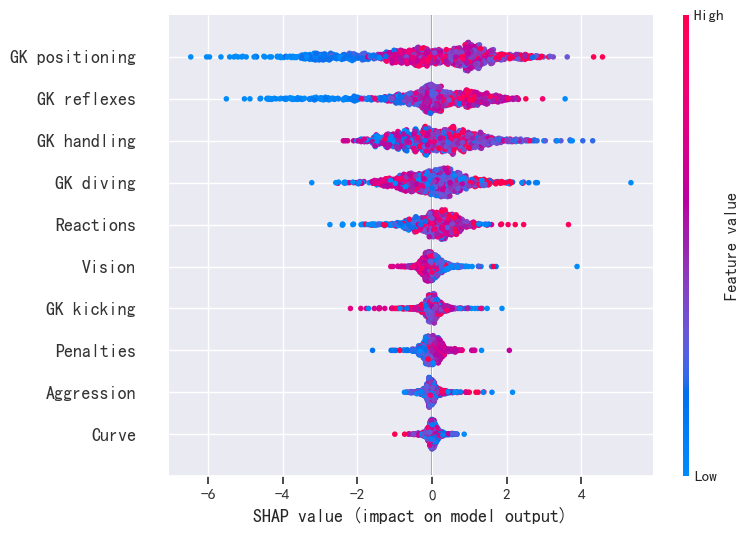

In [50]:
shap.summary_plot(shap_values, X)

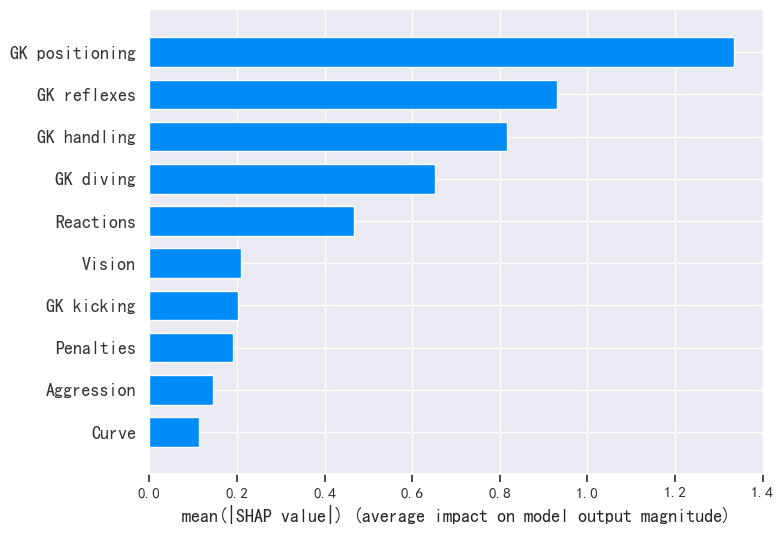

In [51]:
shap.summary_plot(shap_values, X, plot_type="bar")

In [52]:
shap_values_mean = shap_values.abs.mean(axis=0)
shap_values_mean

.values =
array([0.20844123, 0.19077597, 0.14648078, 0.113637  , 0.20223593,
       0.4662774 , 0.81724411, 0.92976327, 1.33569983, 0.65296188])

.base_values =
array([64.59469849])

.data =
array([31.4393798 , 20.47437186, 25.64824121, 14.90753769, 60.97579231,
       58.92815662, 62.48589123, 65.85111651, 63.07132365, 65.1500049 ])